In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math

In [3]:
data = pd.read_json('ibd_admix_data.json')
print(data.head())

    index  number  fraction    u     v   group  true_N  true_T1  true_T2  \
0  [0, 1]   52389  0.992927  0.0  0.35  [0, 0]    5000       30      100   
1  [0, 2]   52549  0.995403  0.0  0.35  [0, 0]    5000       30      100   
2  [0, 3]   51393  0.975364  0.0  0.35  [0, 0]    5000       30      100   
3  [0, 4]   51266  0.964924  0.0  0.35  [0, 0]    5000       30      100   
4  [0, 5]   51637  0.982030  0.0  0.35  [0, 0]    5000       30      100   

   true_T3  
0     1000  
1     1000  
2     1000  
3     1000  
4     1000  


In [4]:
#Sanity Check if the fraction sums to one.
data['index'] = data['index'].apply(tuple)
data['group'] = data['group'].apply(tuple)
data.groupby(['index'])['fraction'].sum()

index
(0, 1)      1.0
(0, 2)      1.0
(0, 3)      1.0
(0, 4)      1.0
(0, 5)      1.0
           ... 
(76, 78)    1.0
(76, 79)    1.0
(77, 78)    1.0
(77, 79)    1.0
(78, 79)    1.0
Name: fraction, Length: 3160, dtype: float64

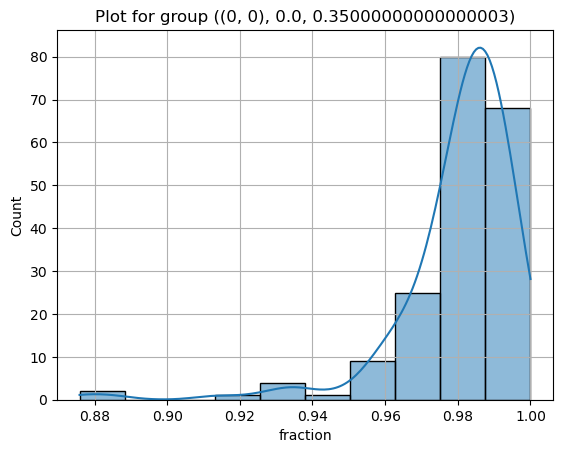

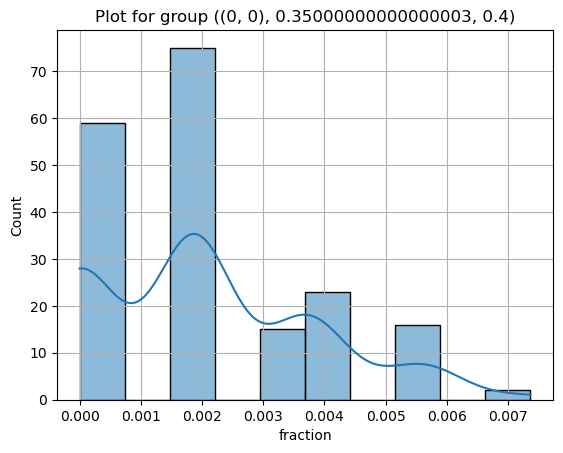

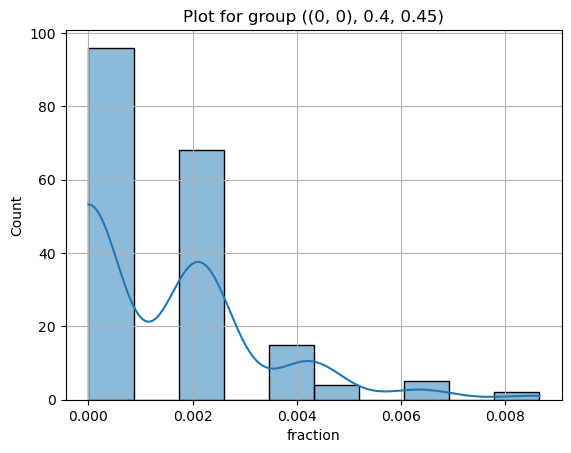

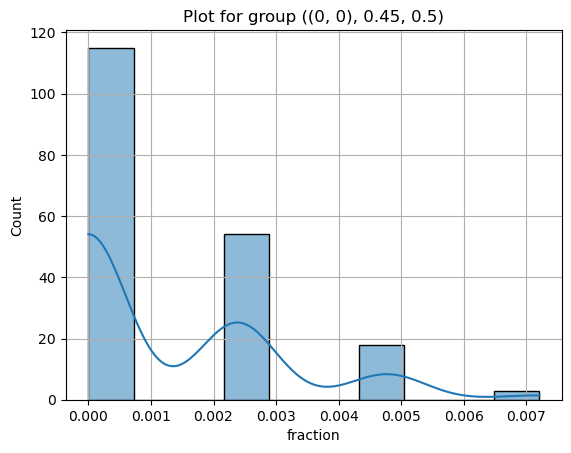

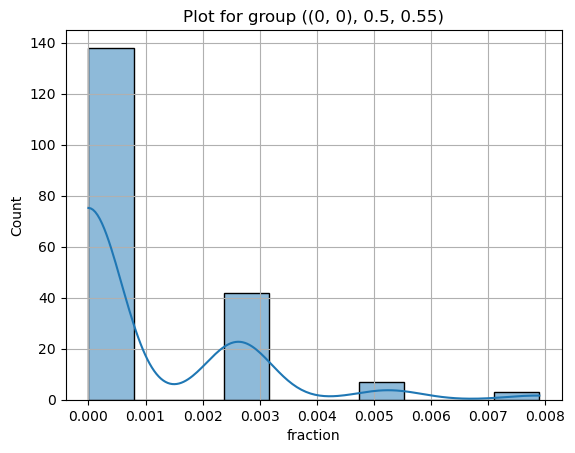

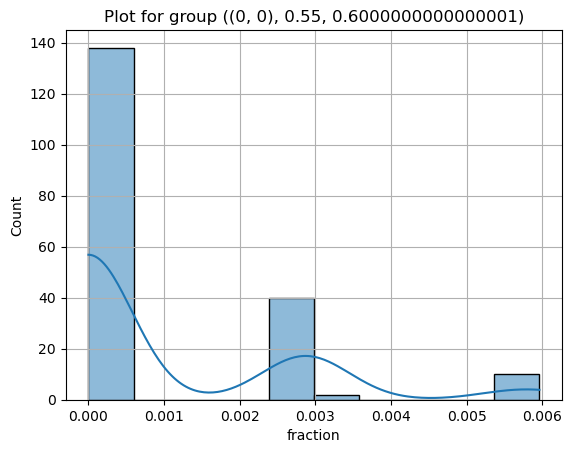

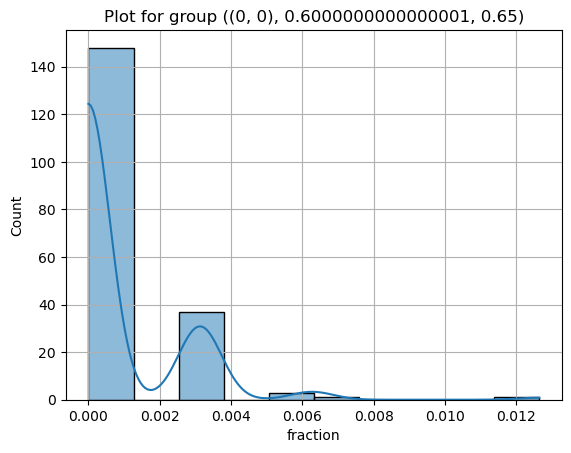

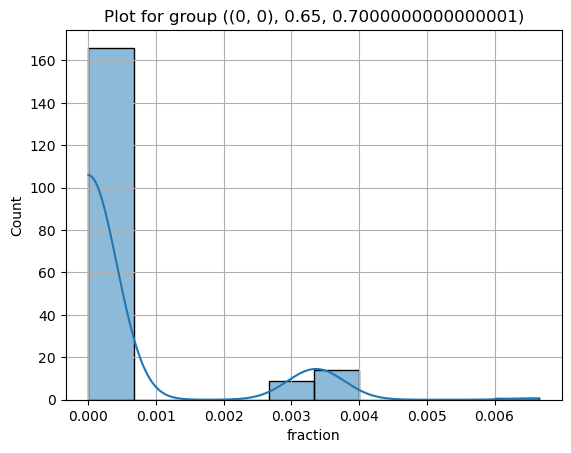

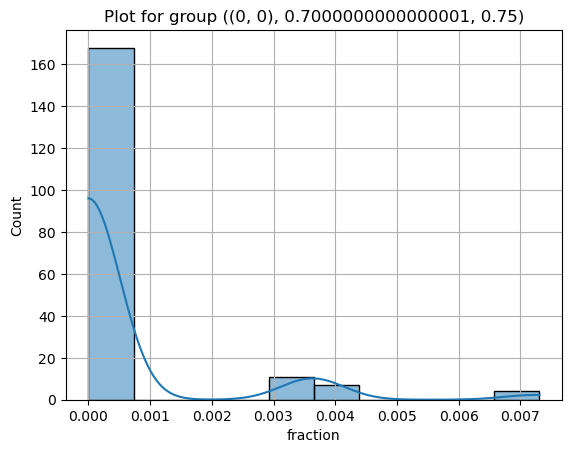

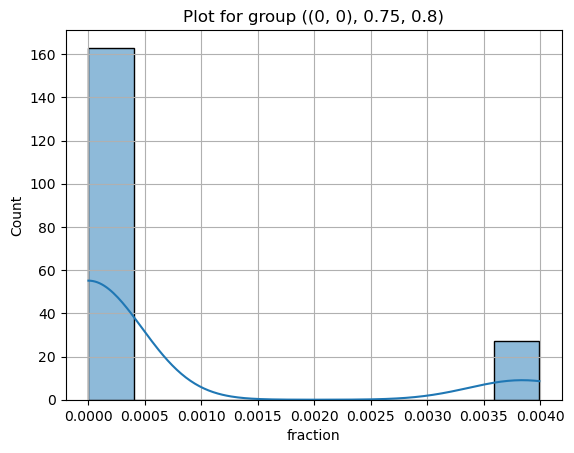

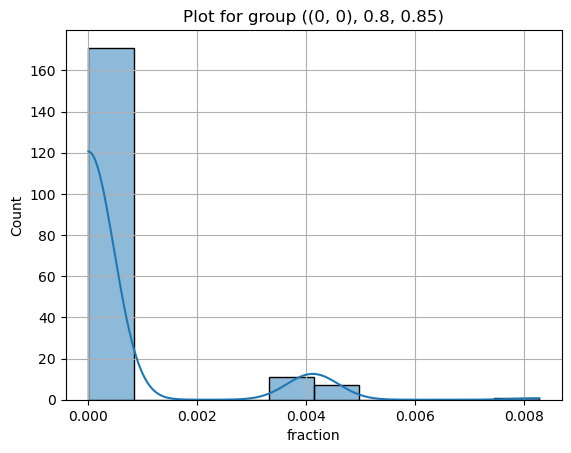

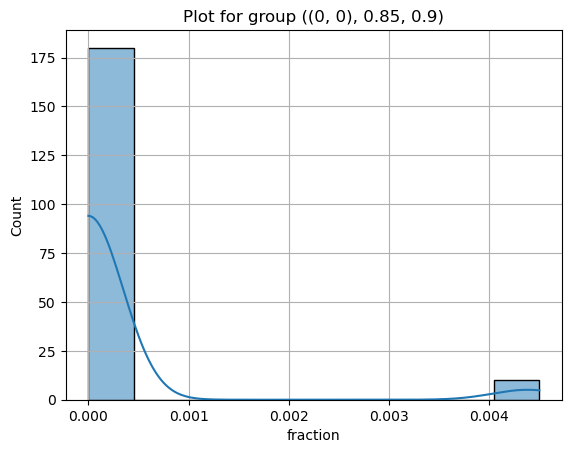

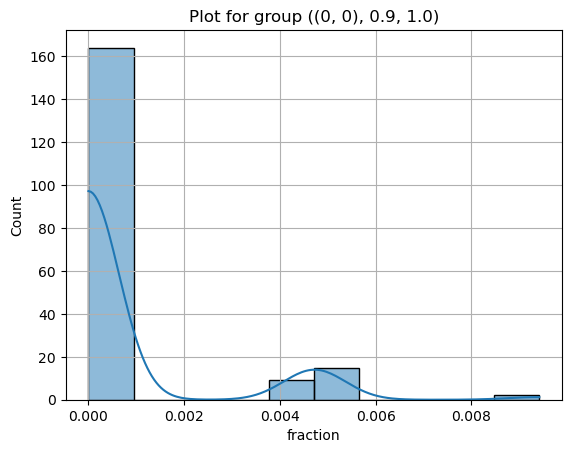

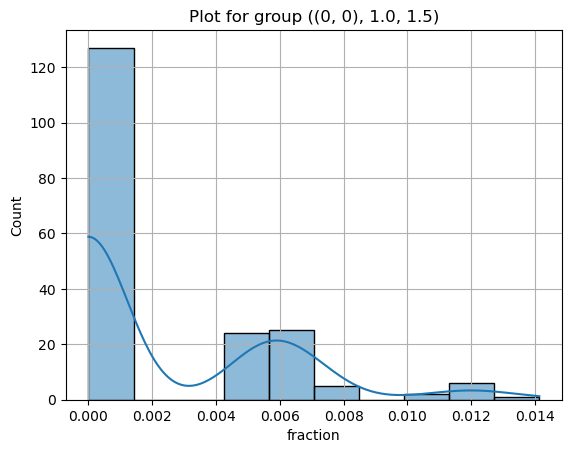

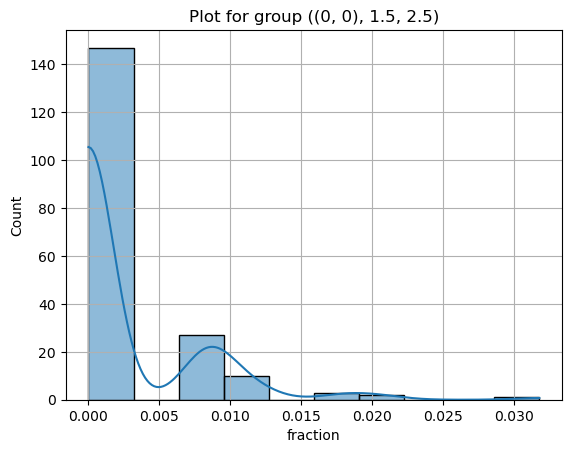

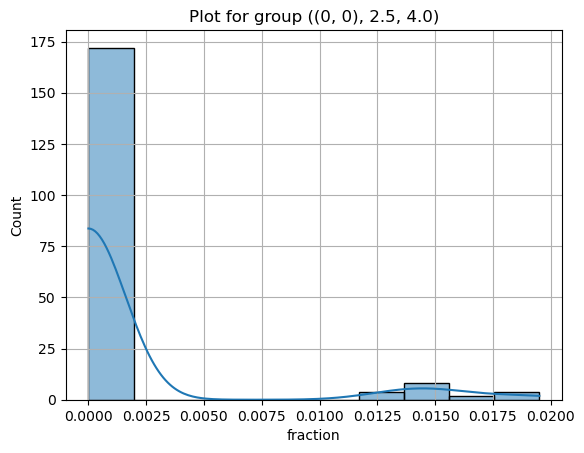

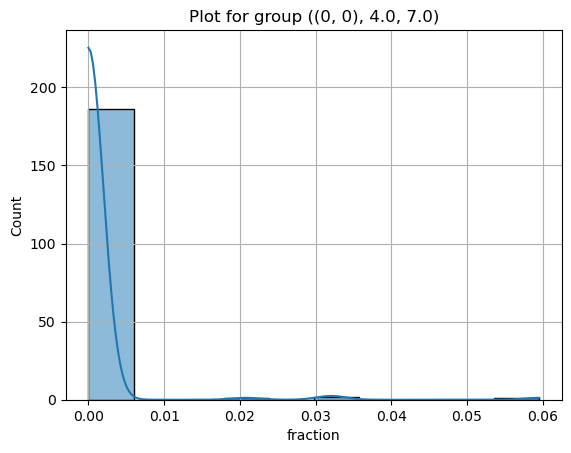

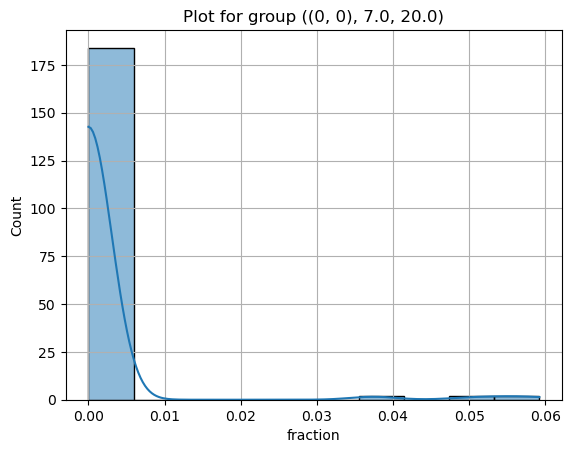

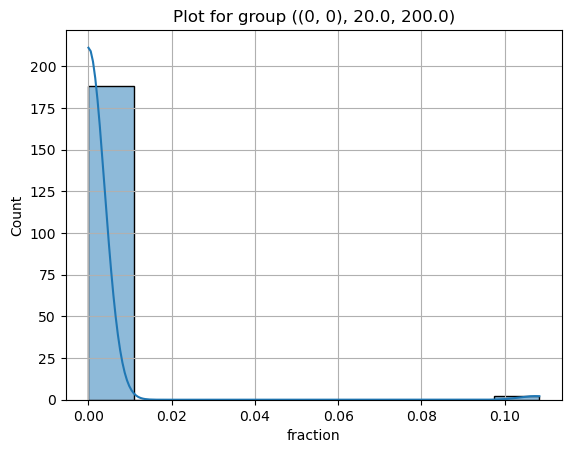

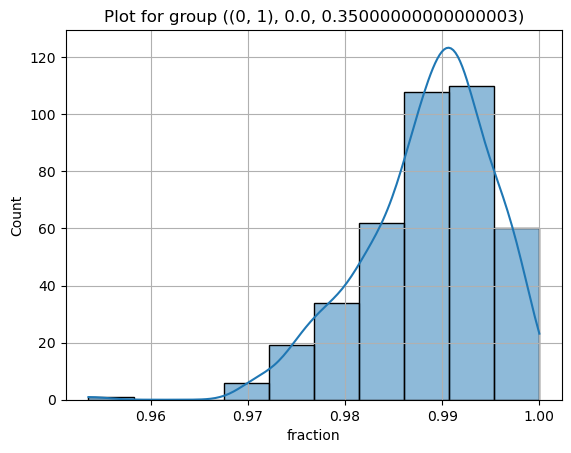

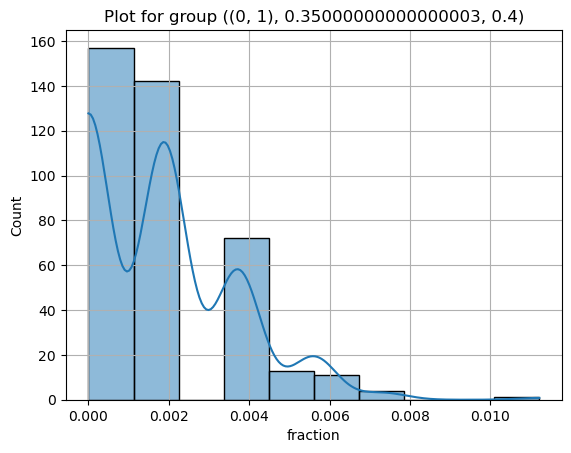

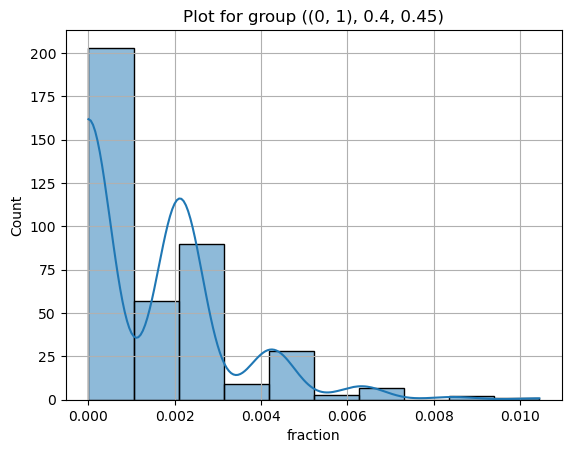

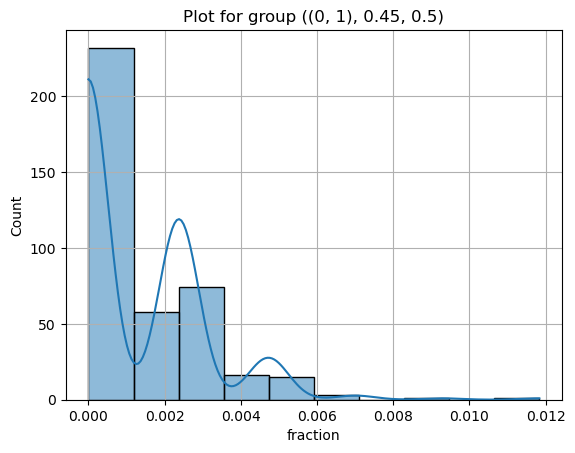

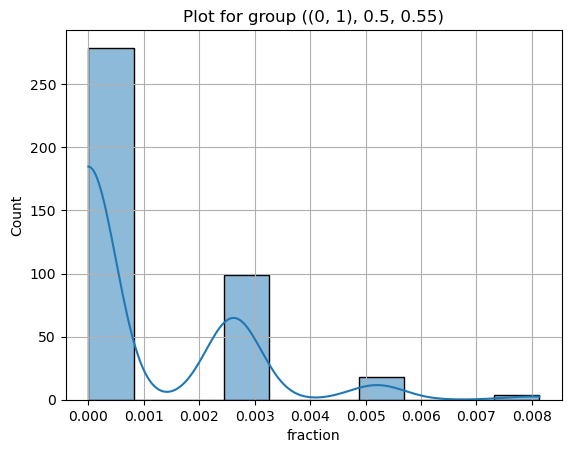

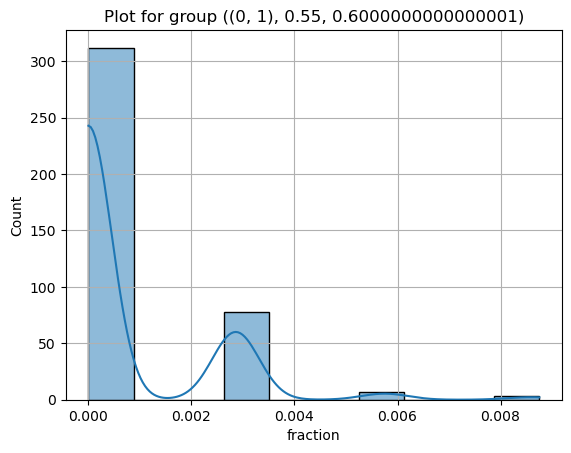

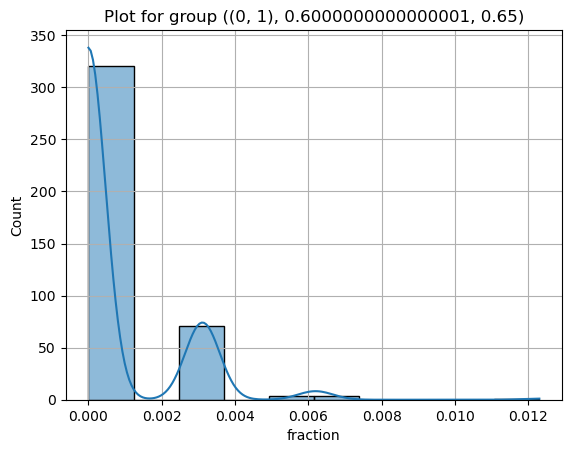

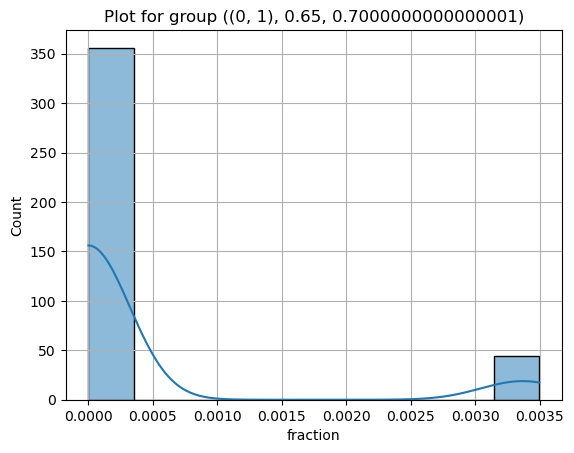

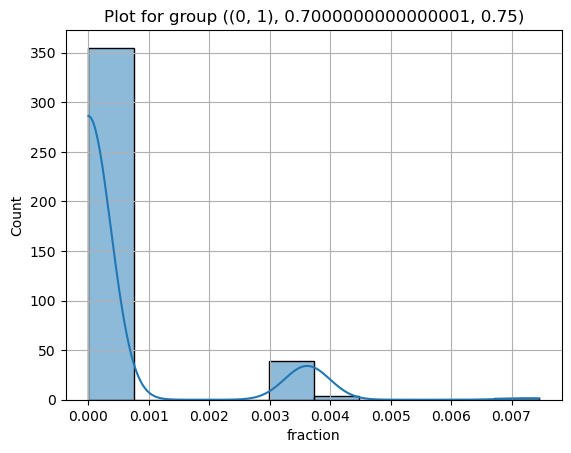

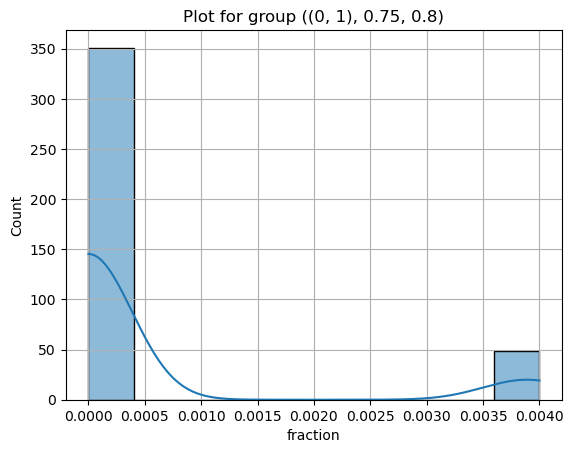

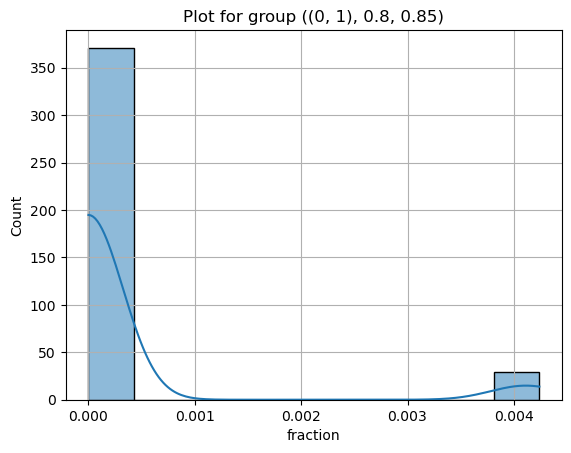

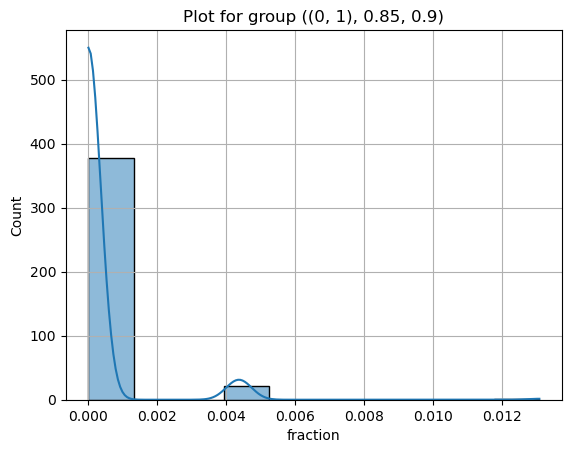

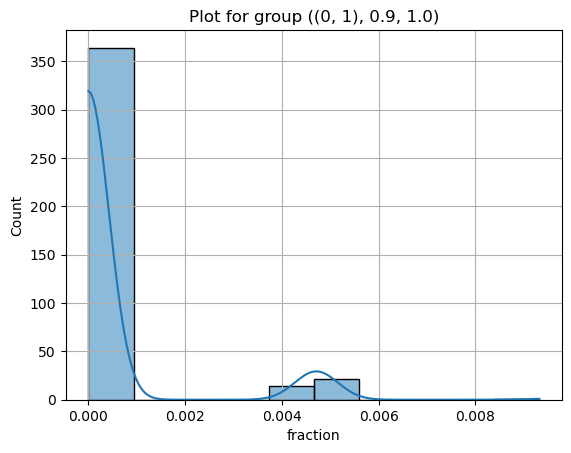

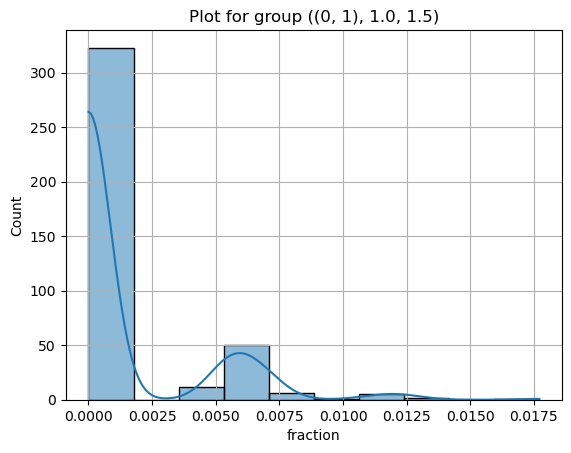

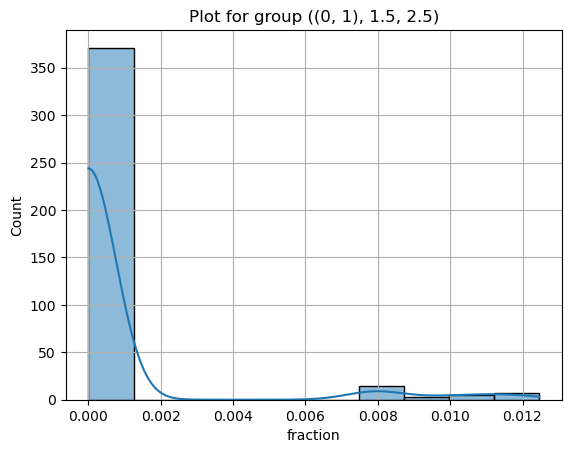

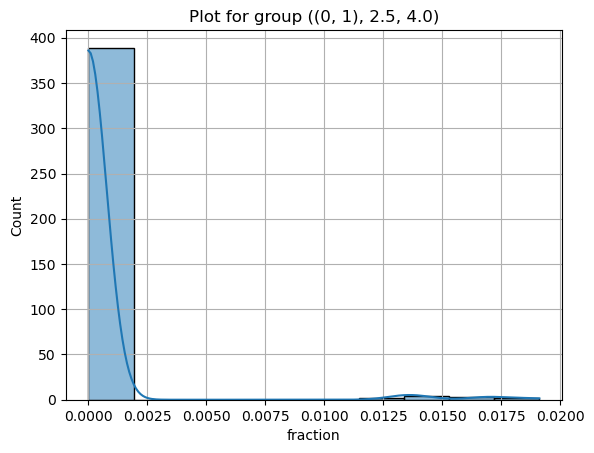

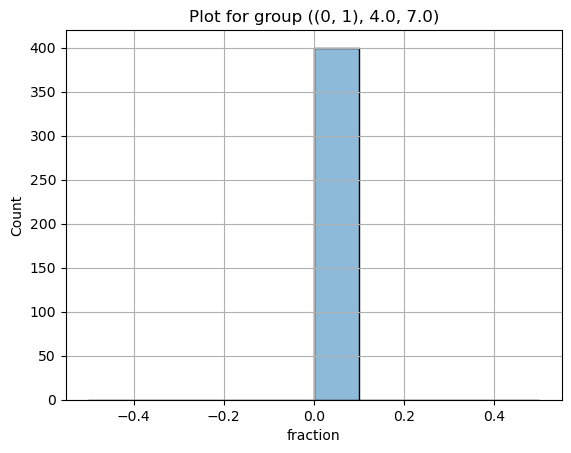

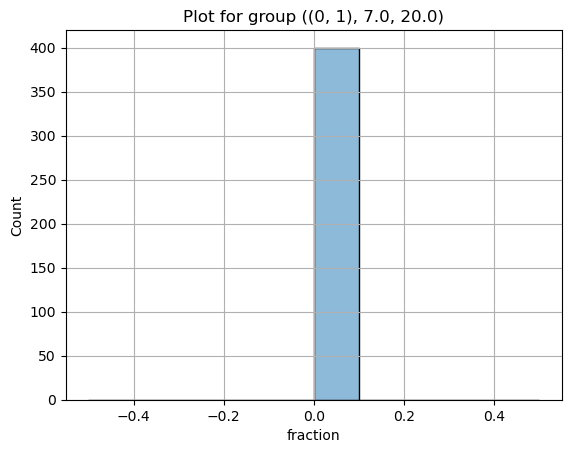

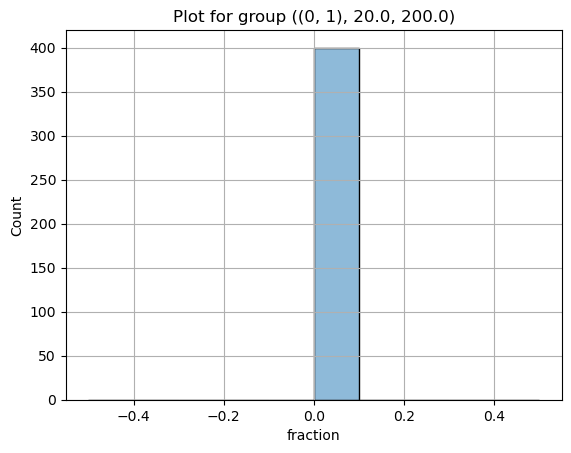

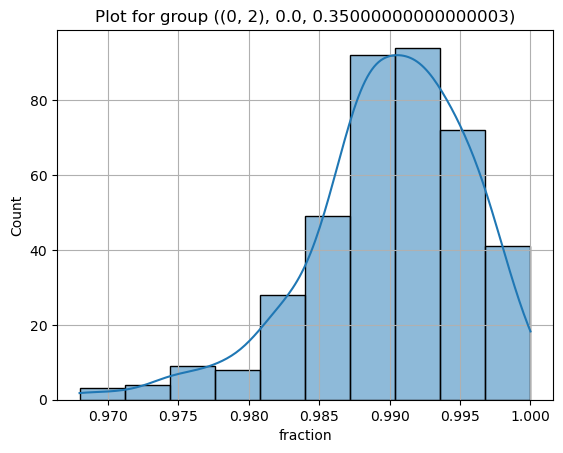

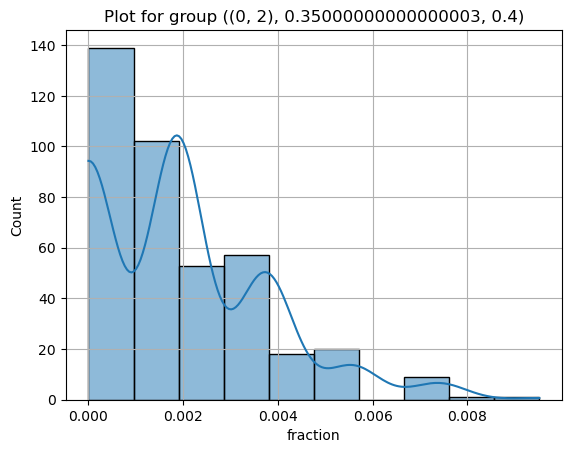

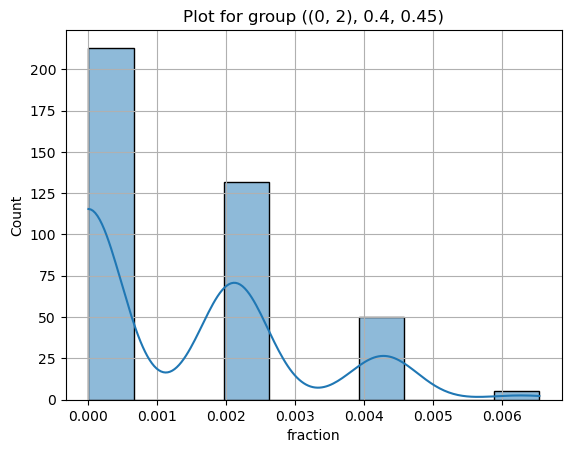

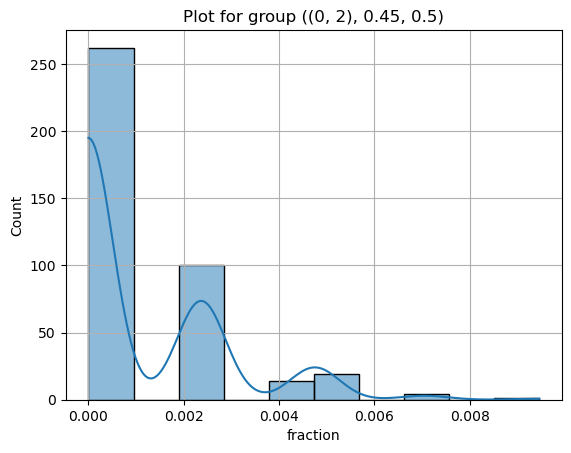

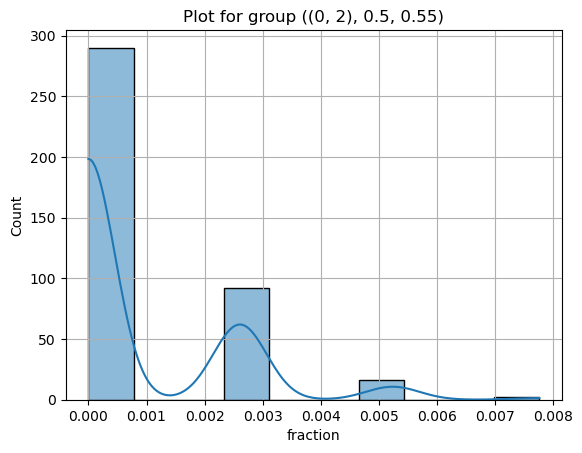

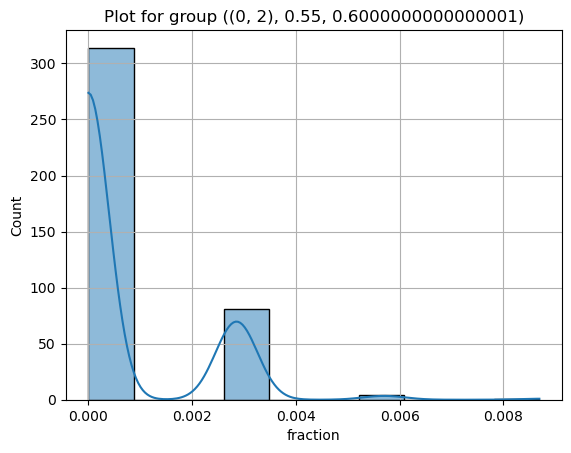

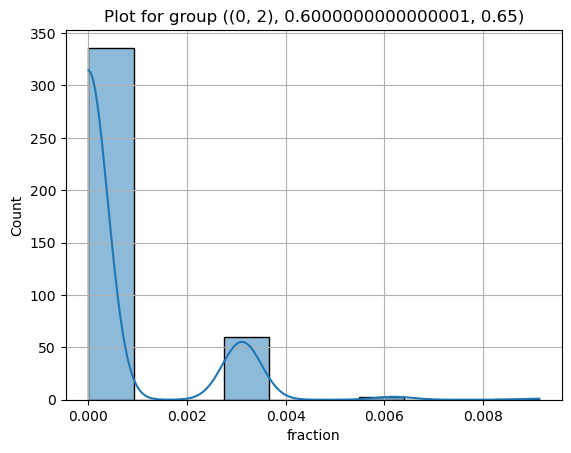

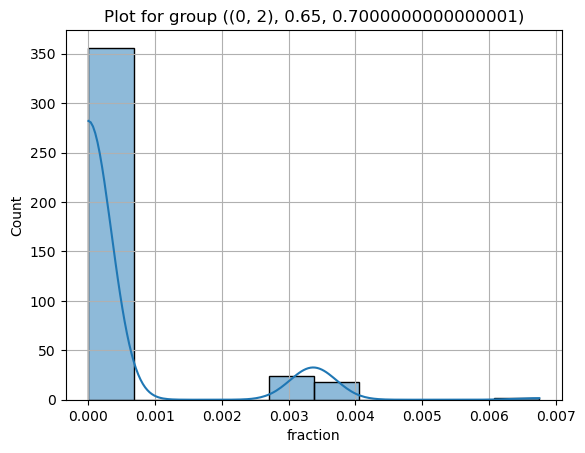

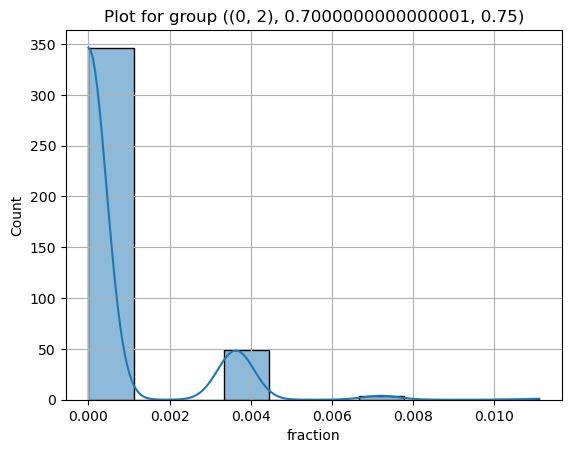

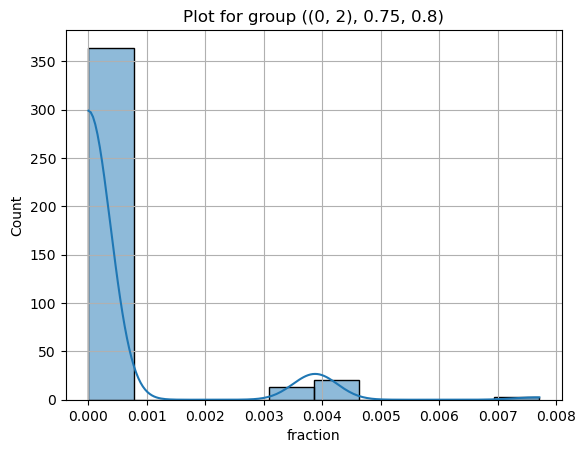

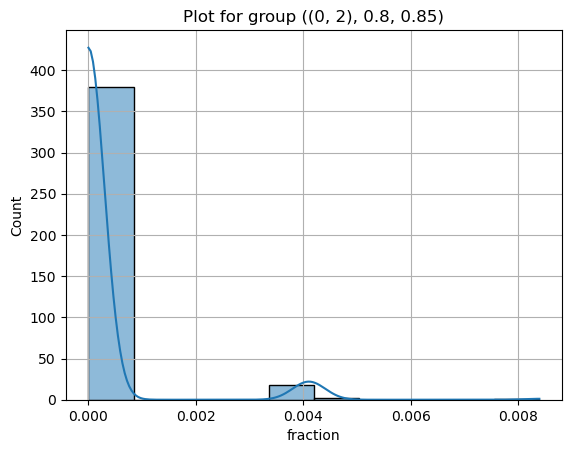

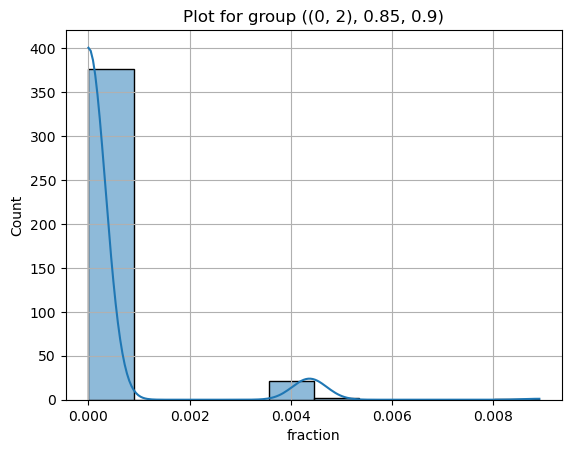

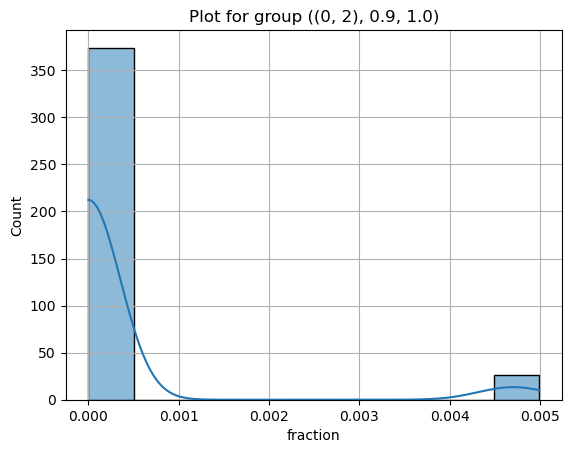

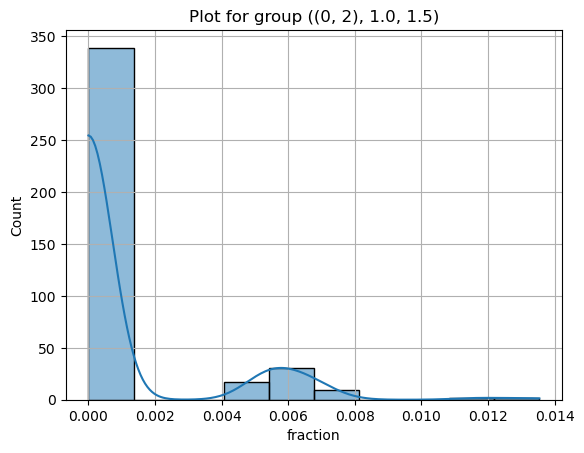

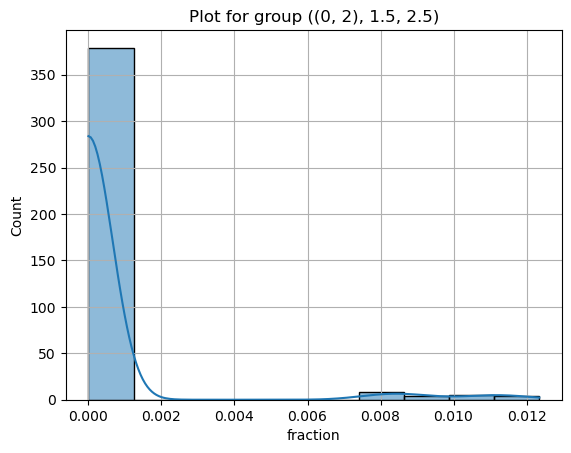

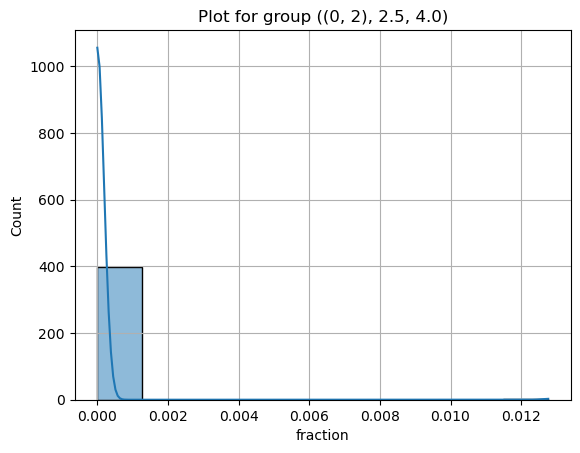

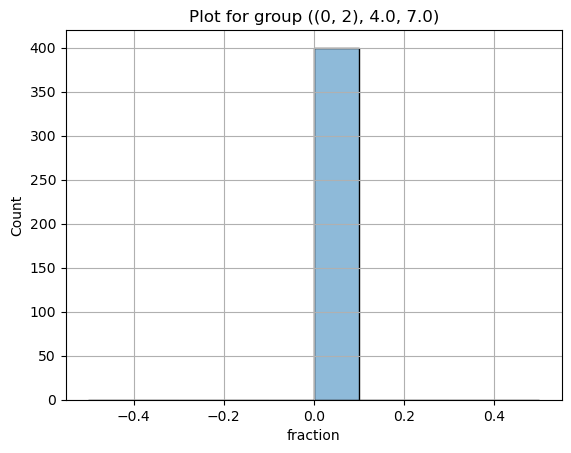

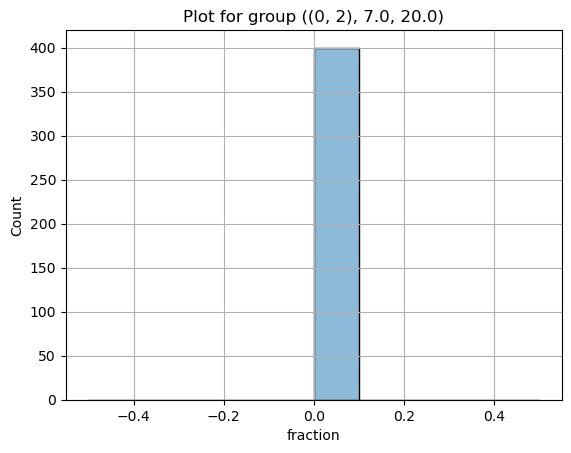

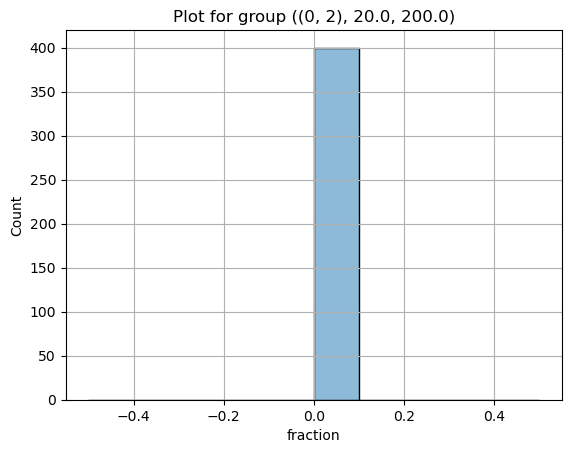

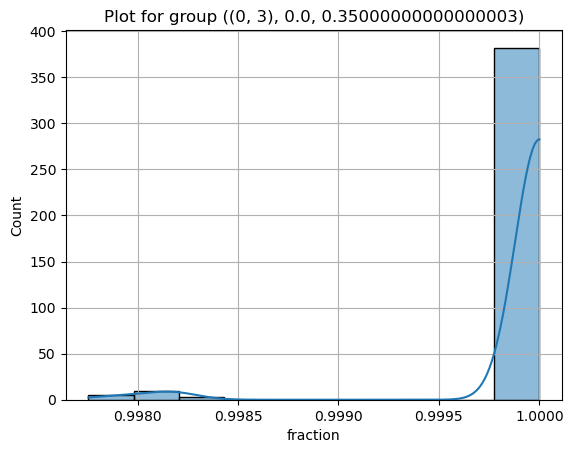

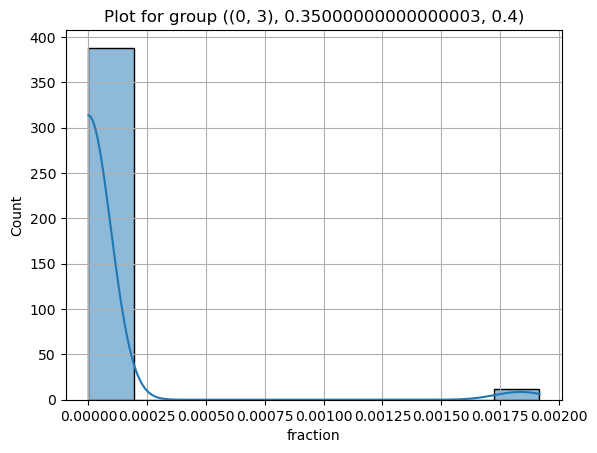

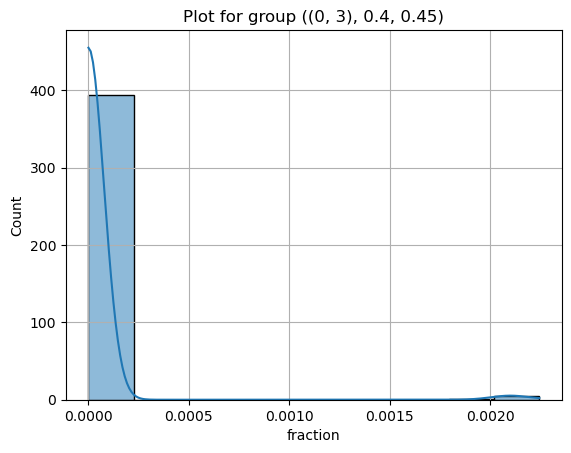

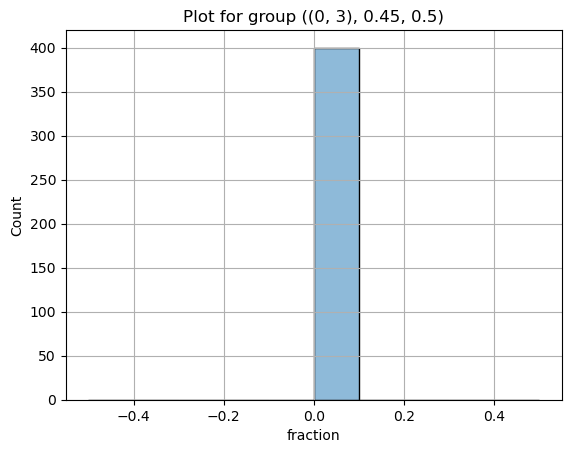

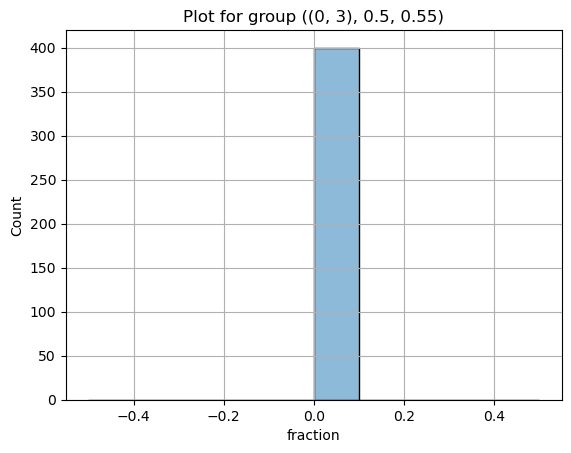

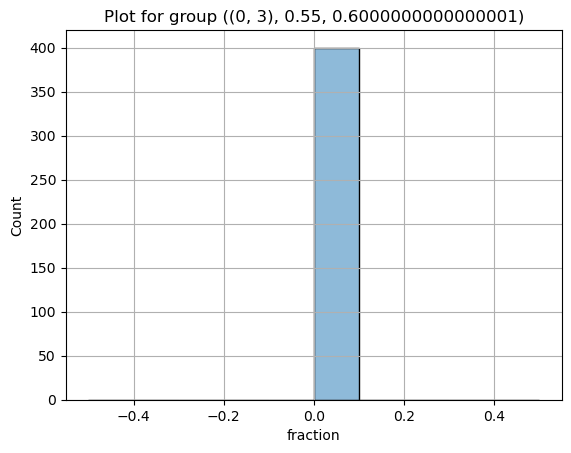

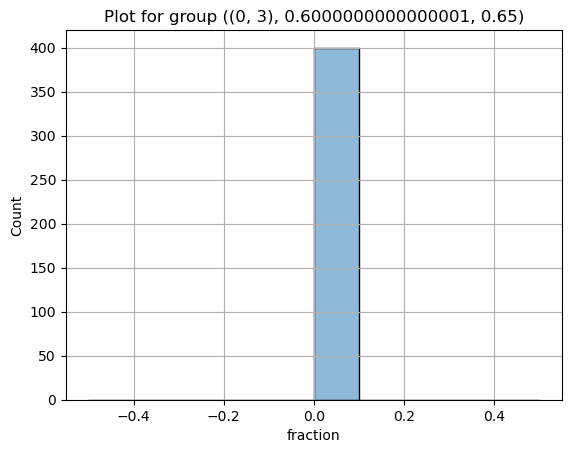

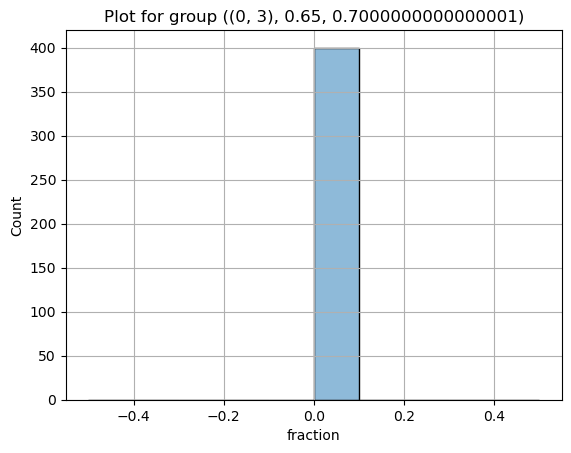

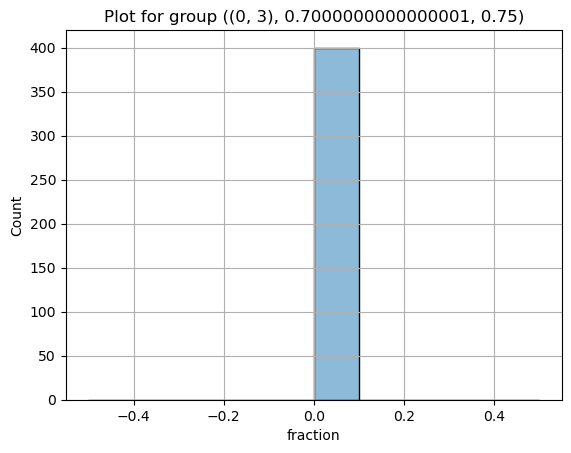

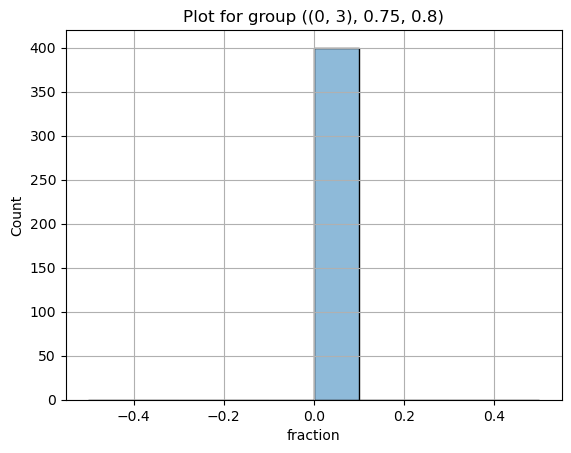

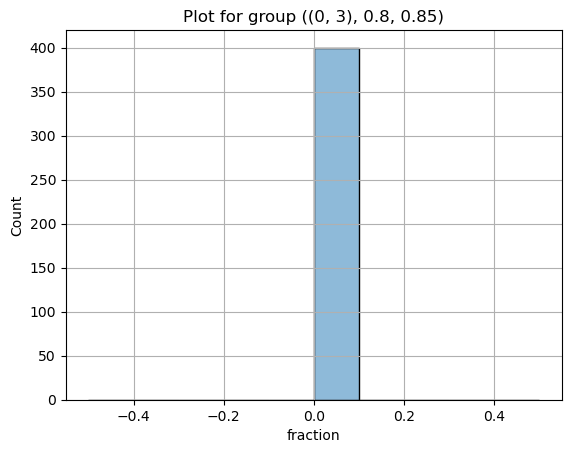

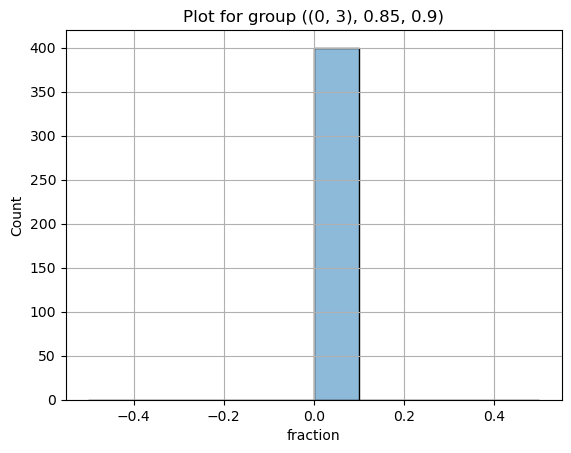

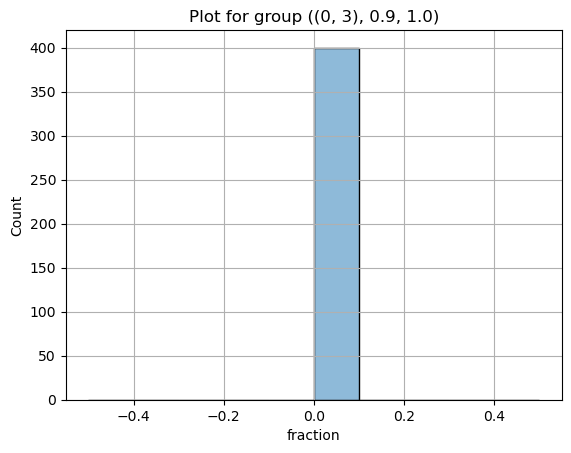

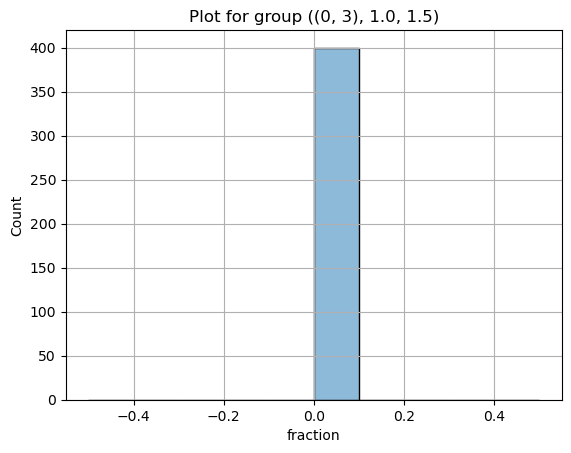

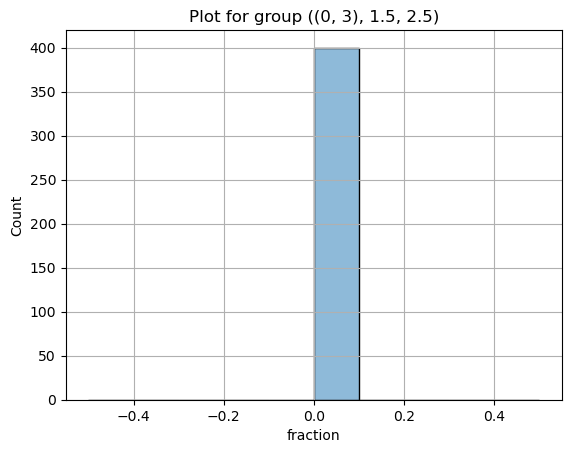

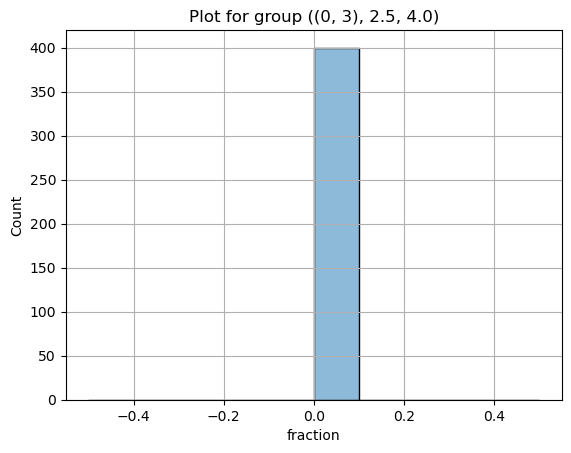

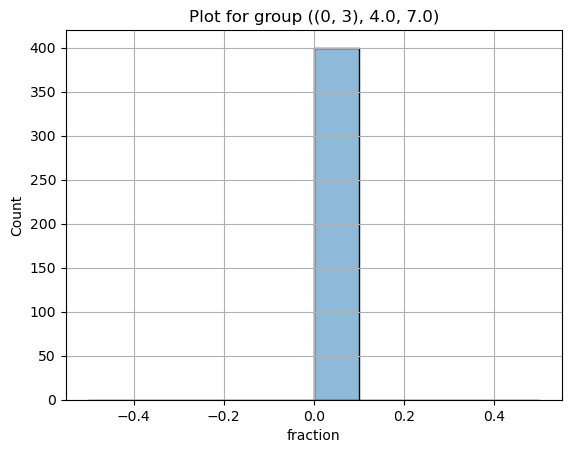

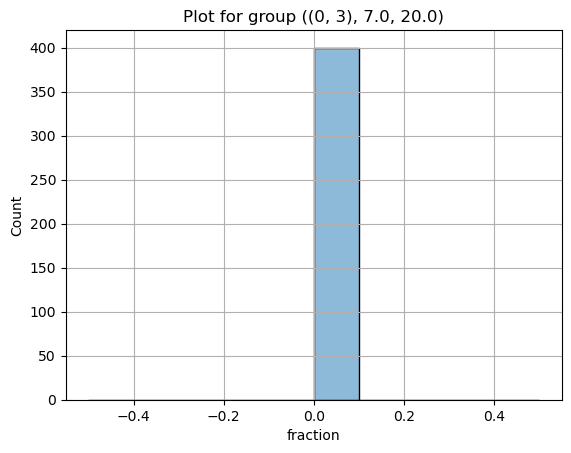

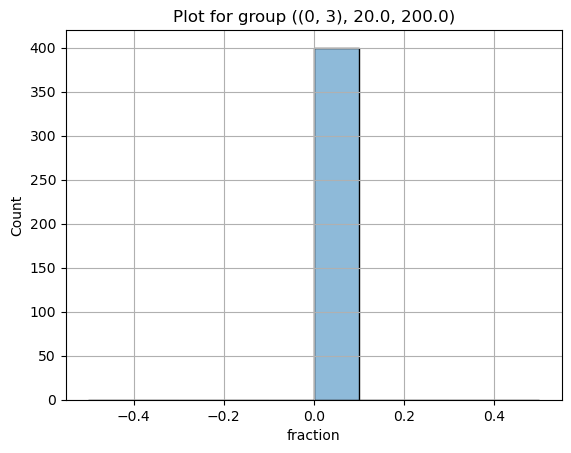

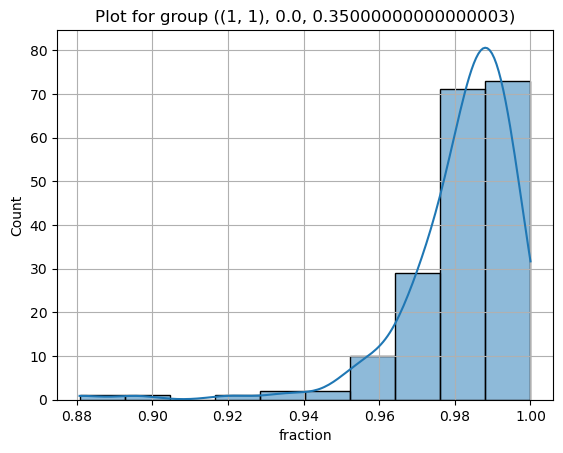

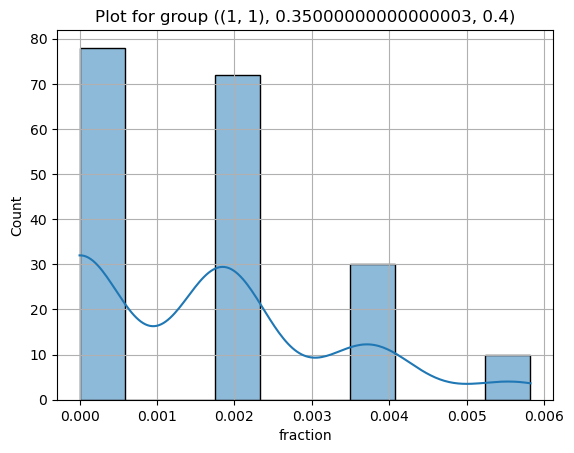

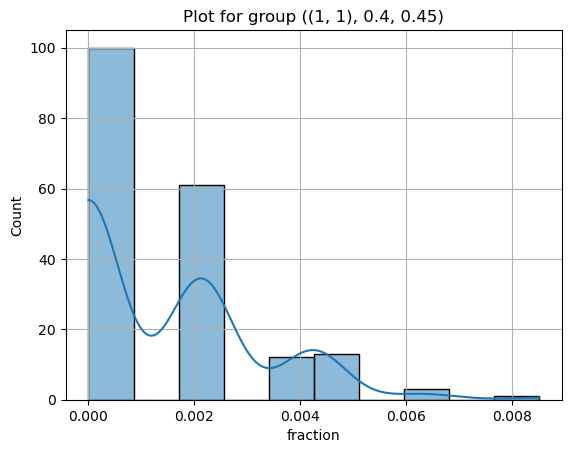

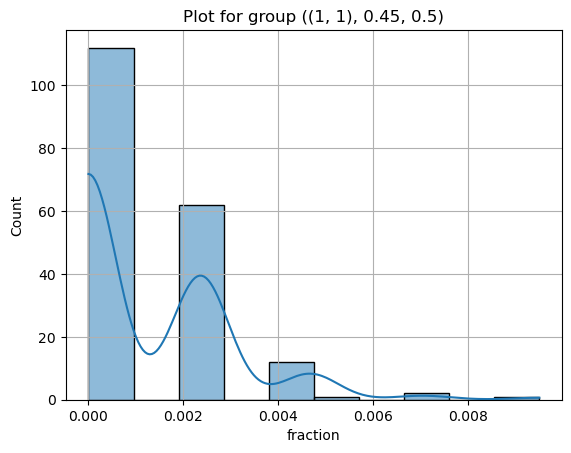

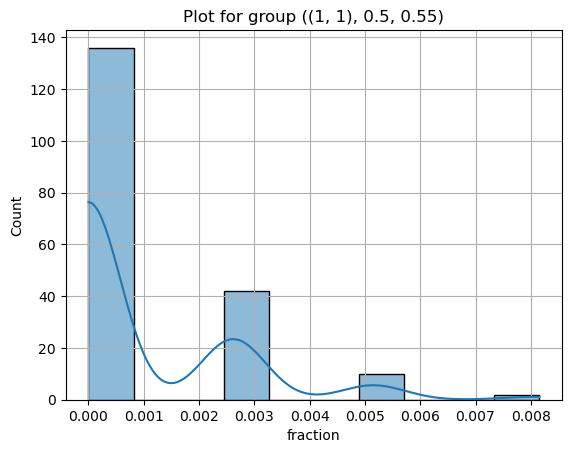

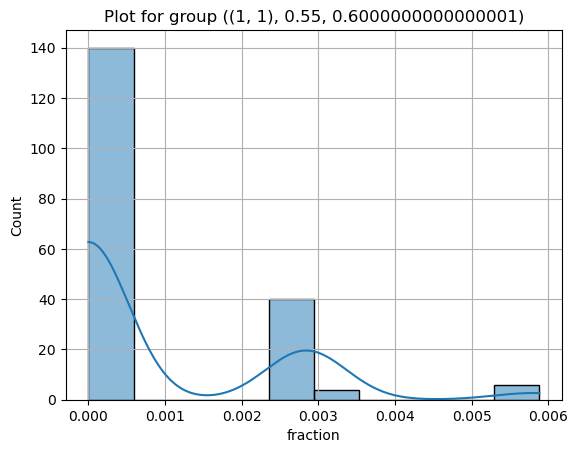

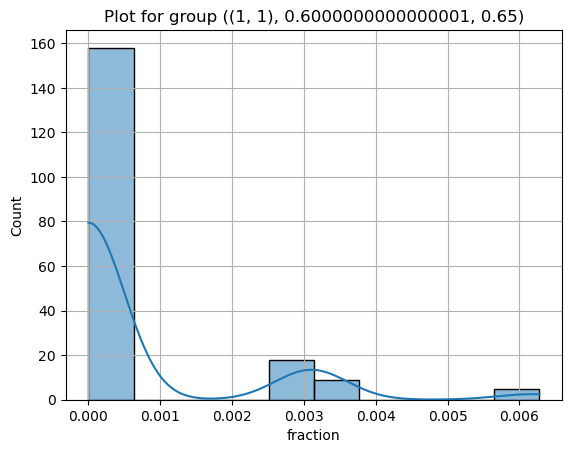

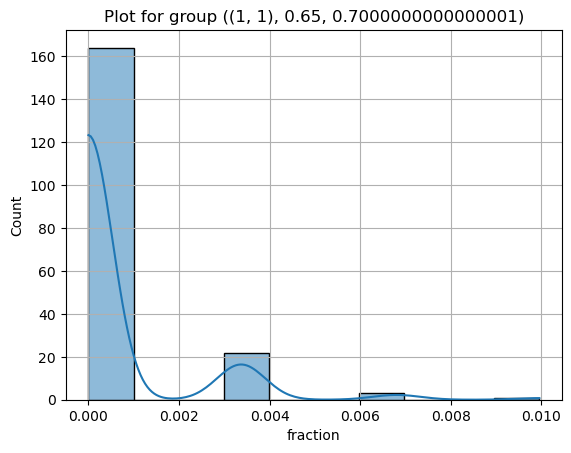

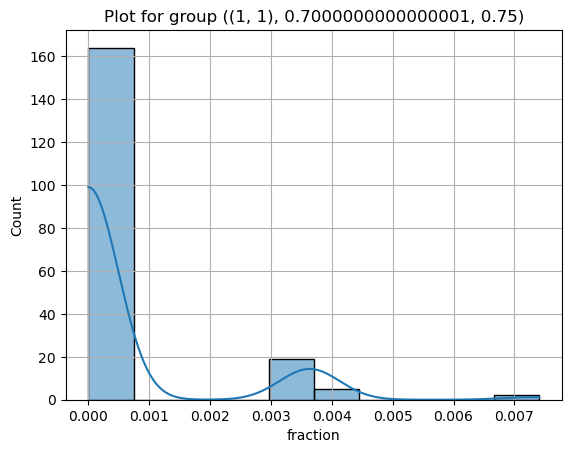

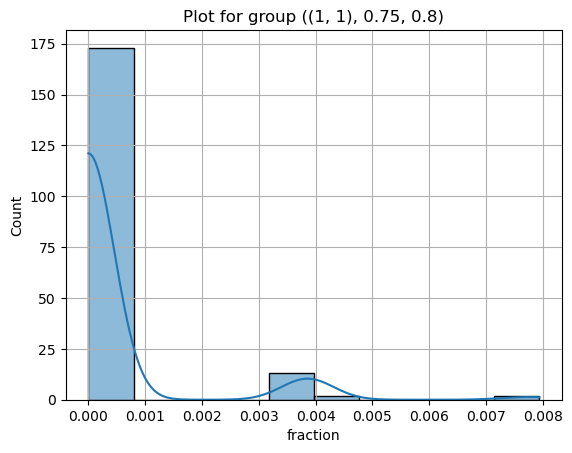

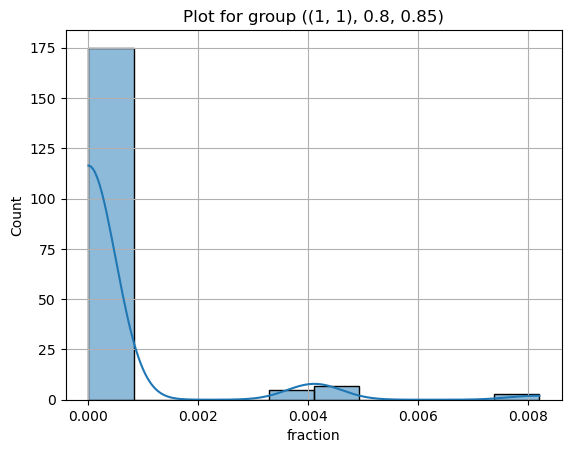

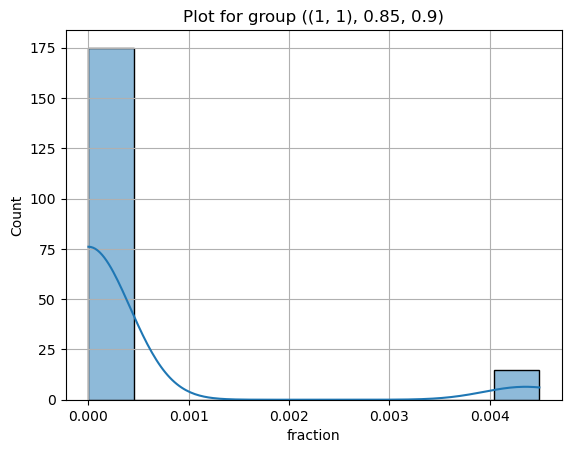

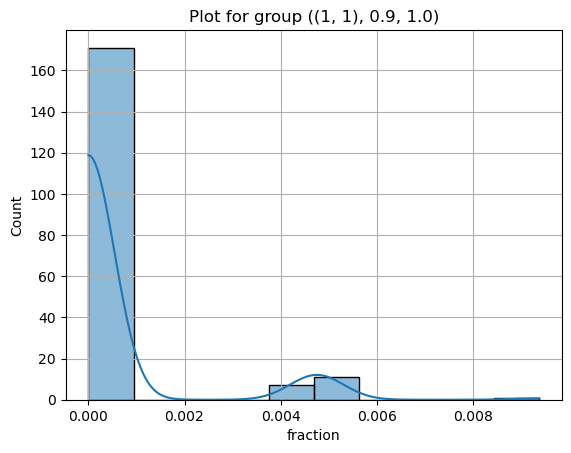

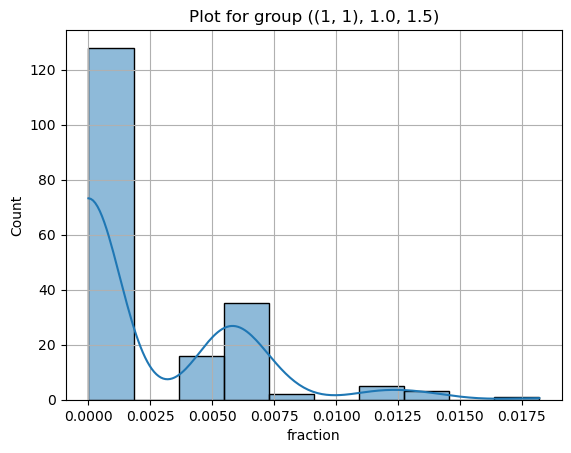

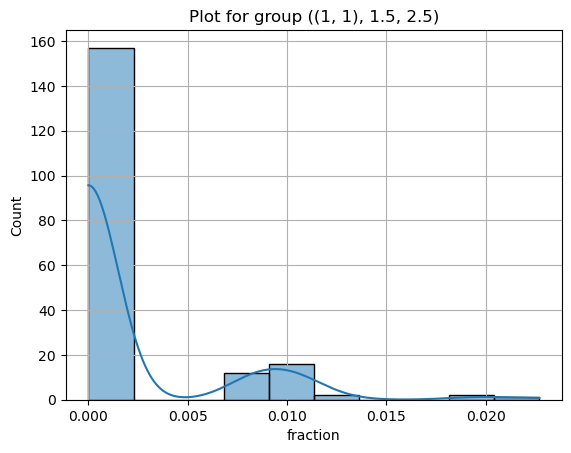

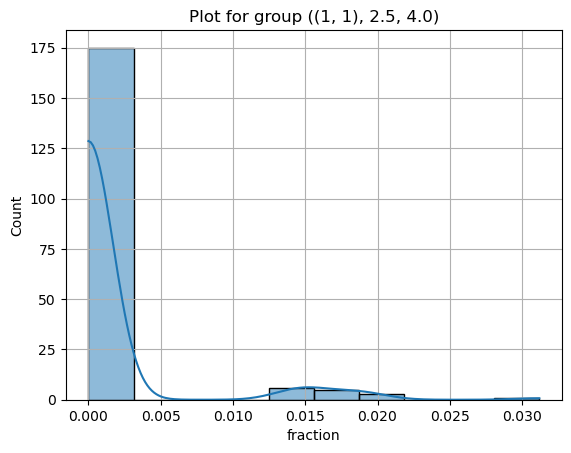

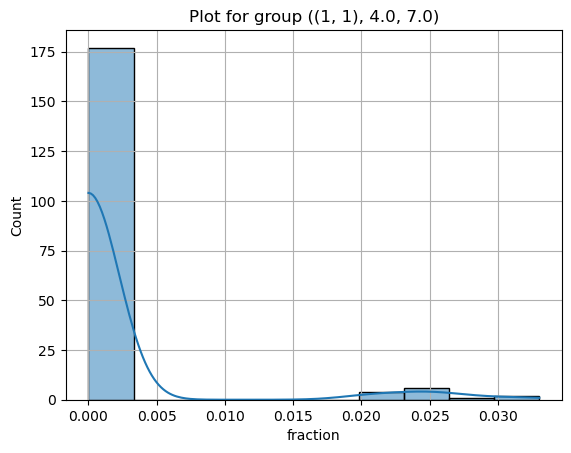

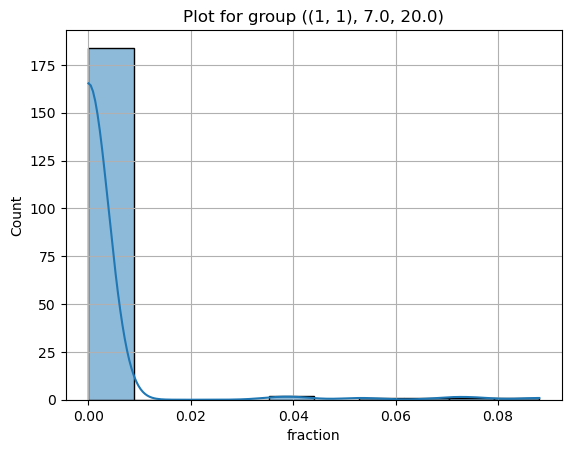

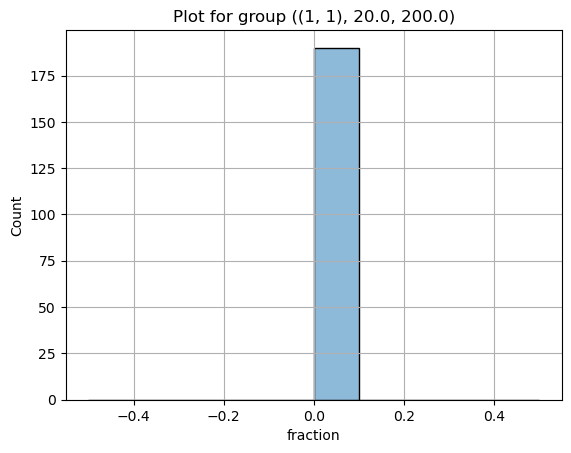

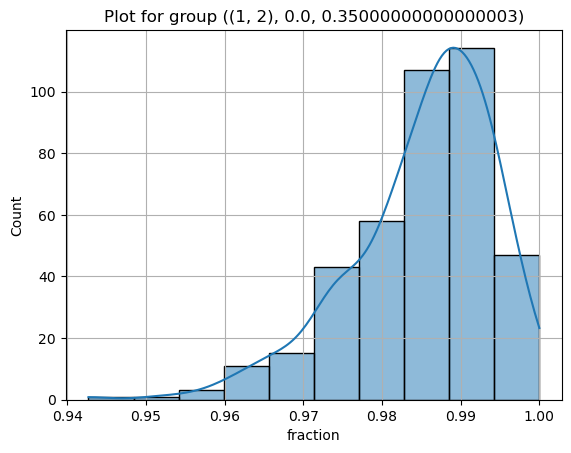

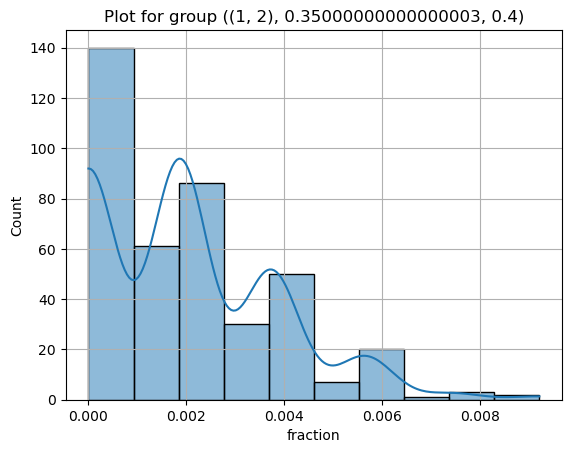

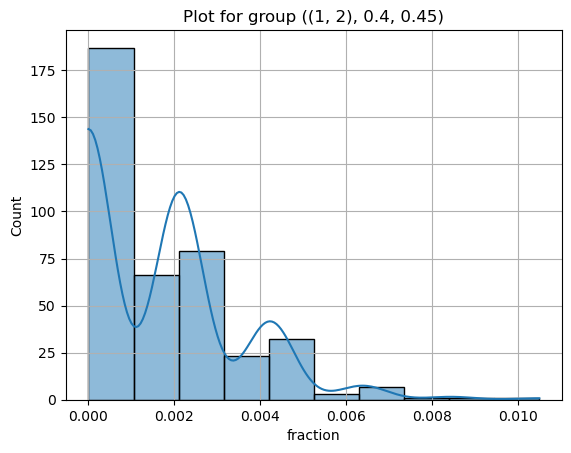

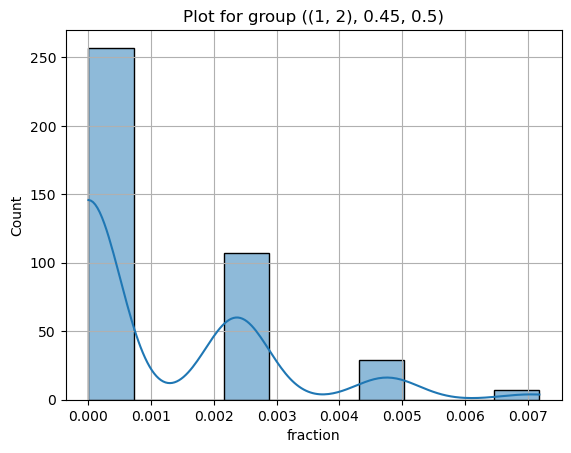

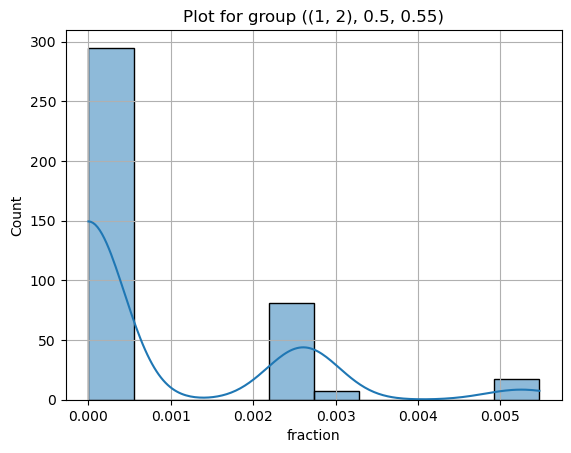

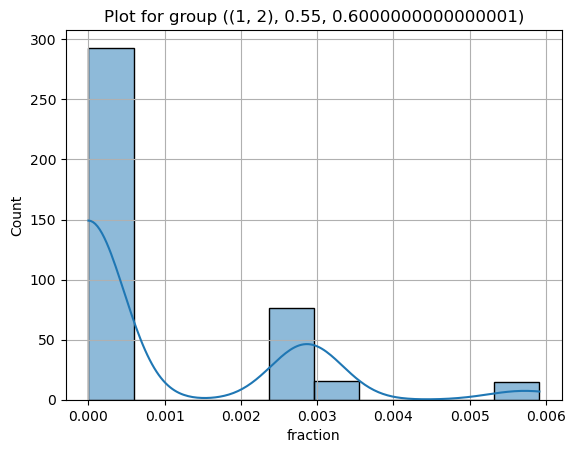

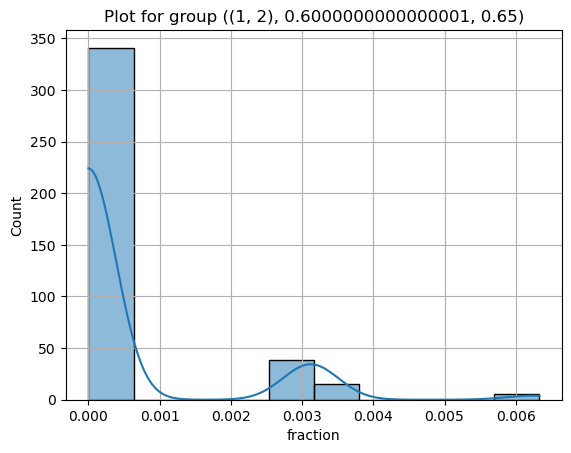

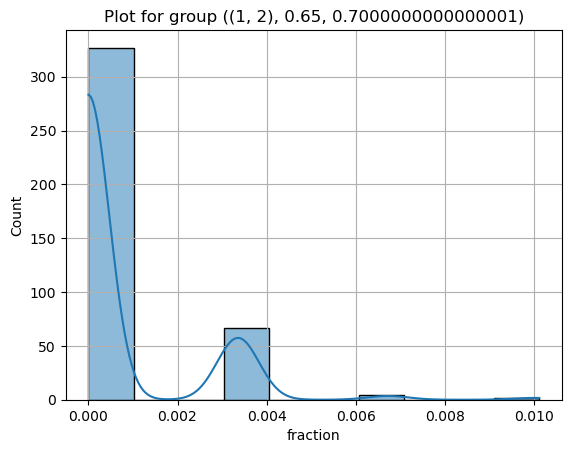

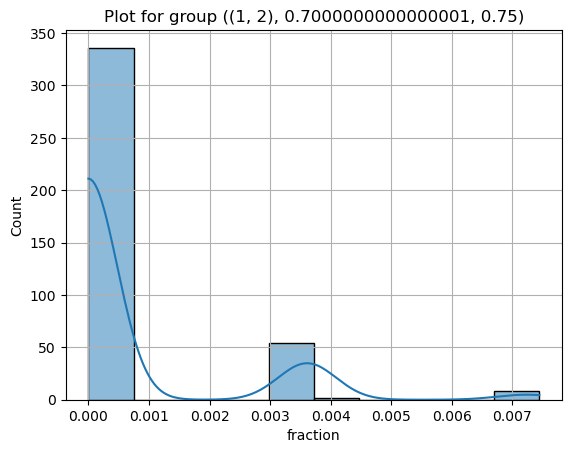

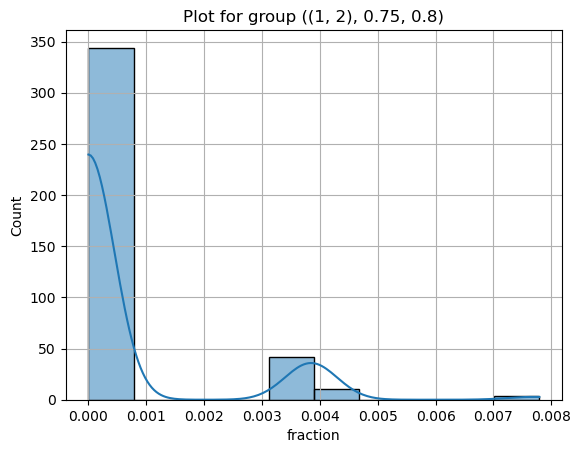

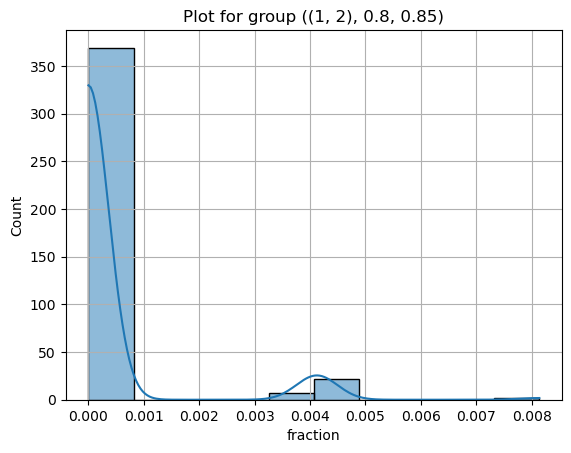

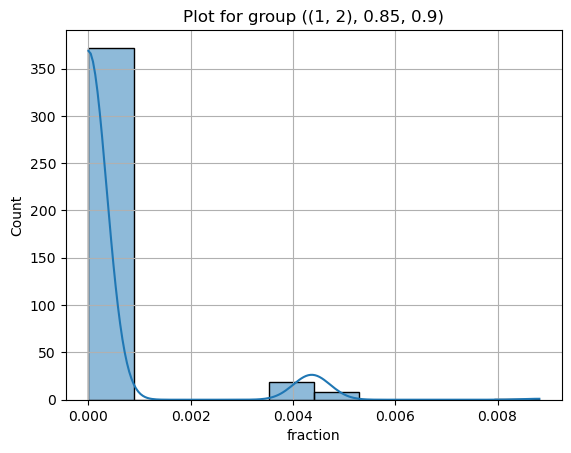

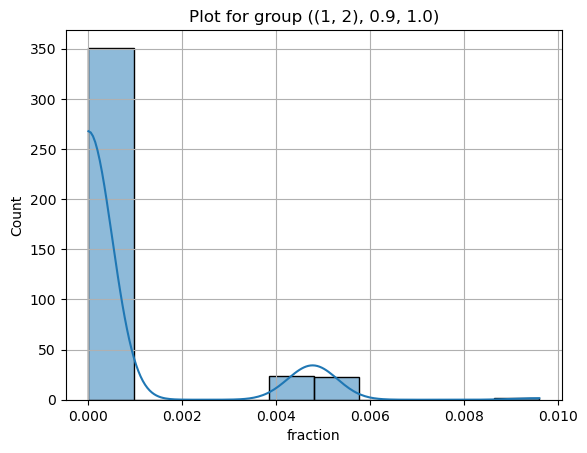

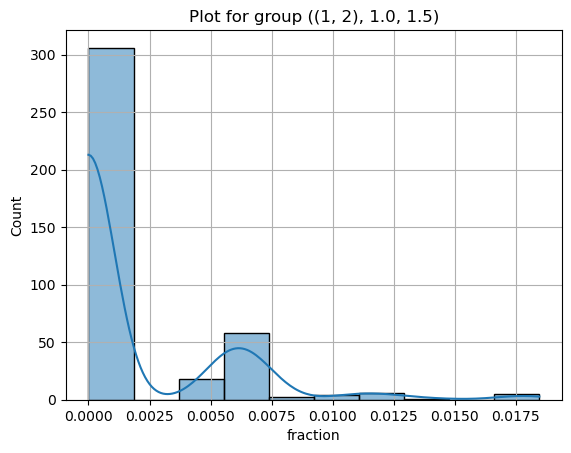

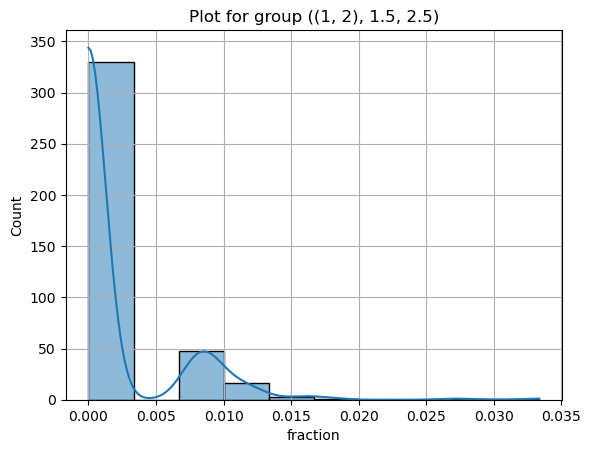

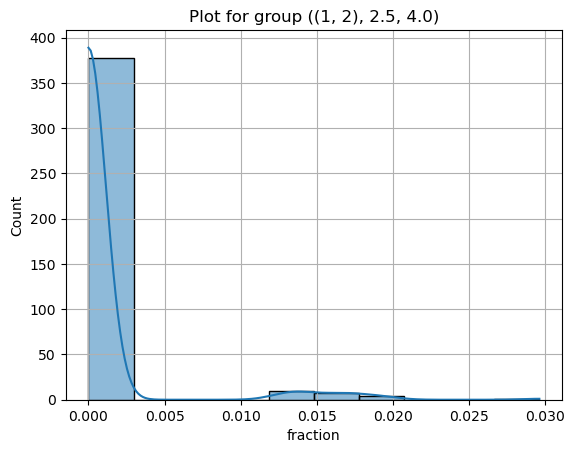

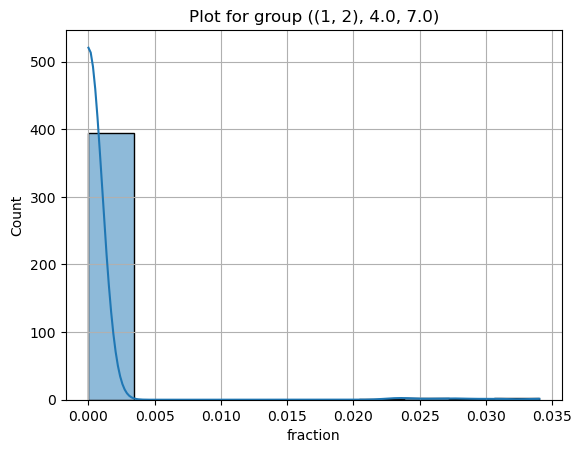

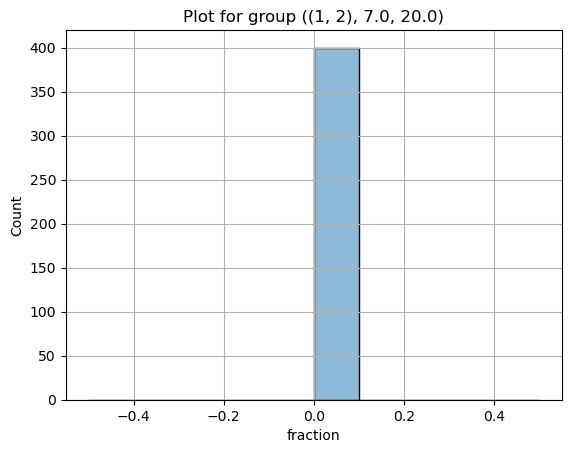

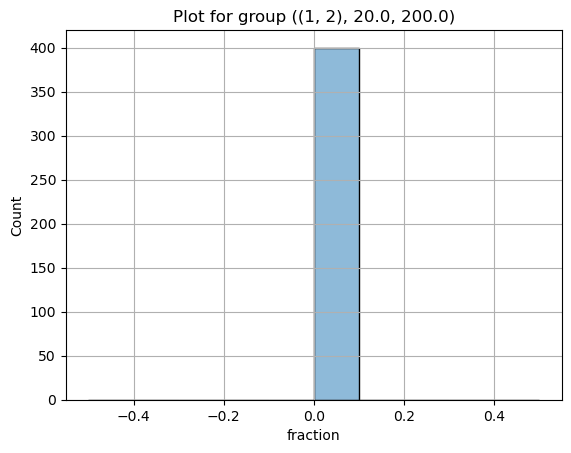

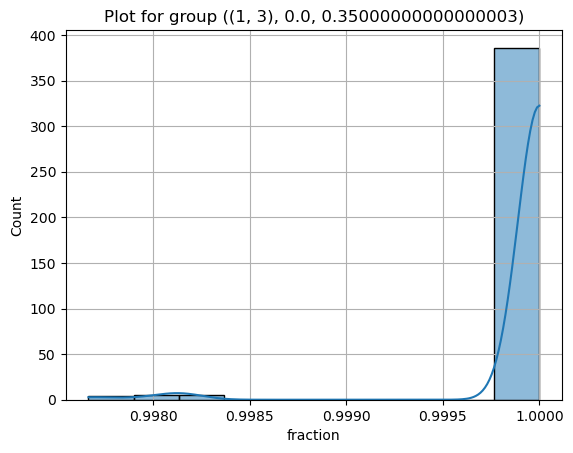

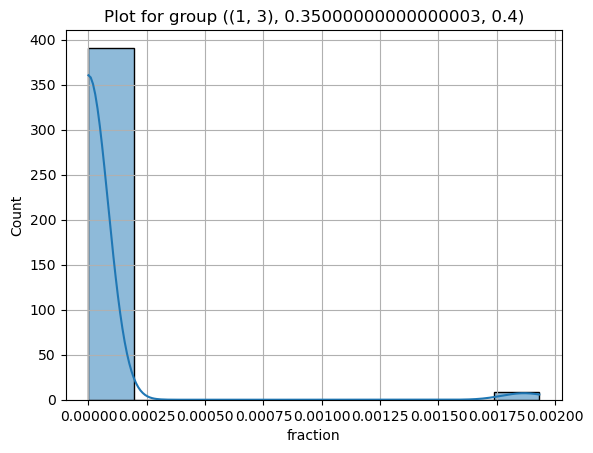

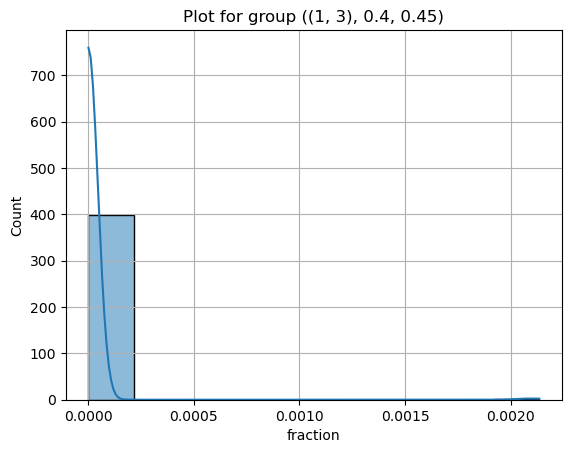

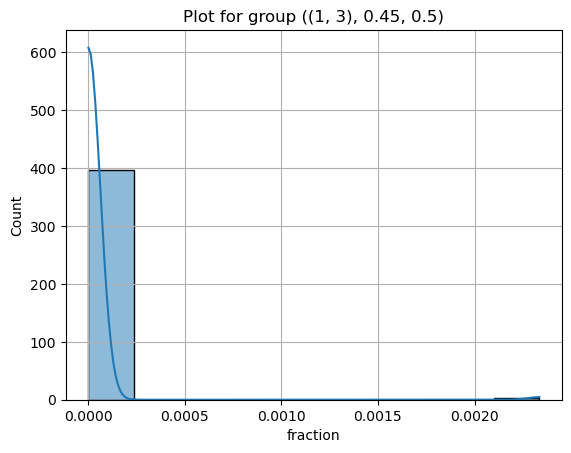

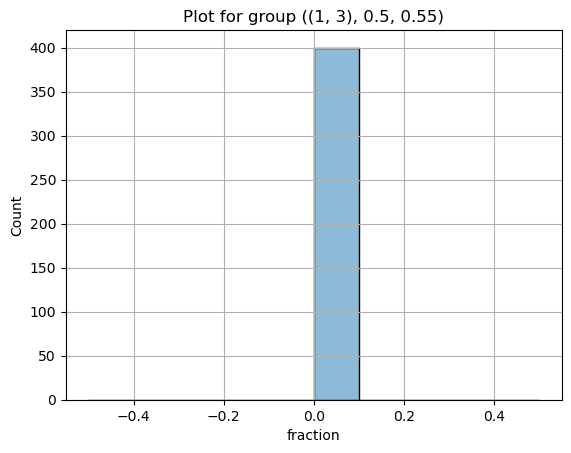

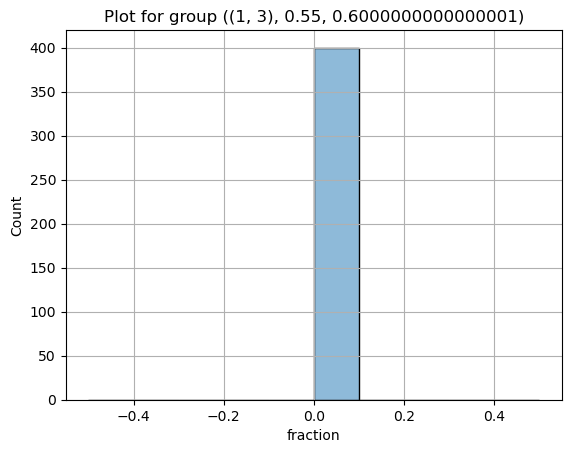

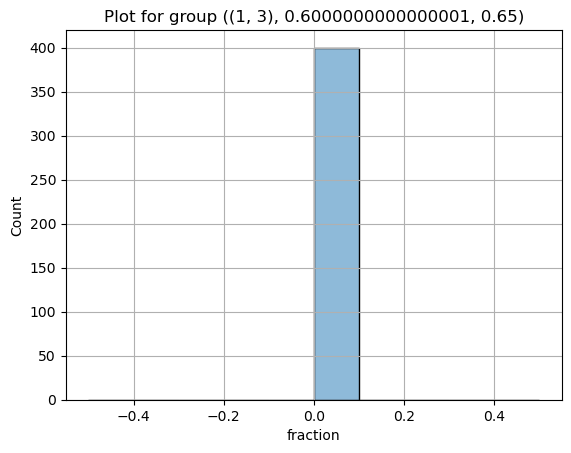

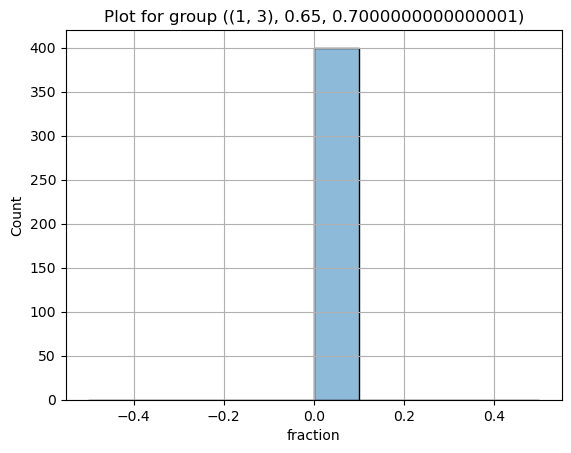

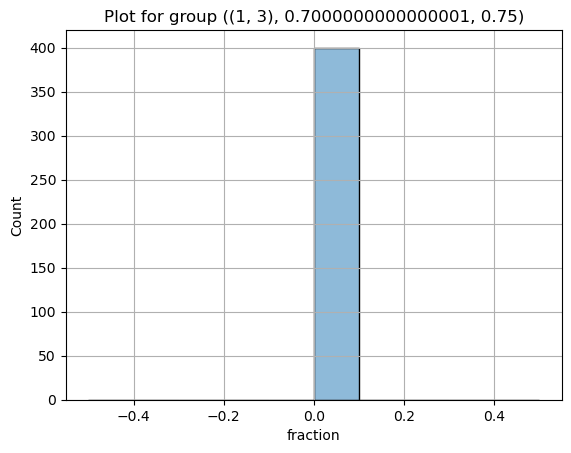

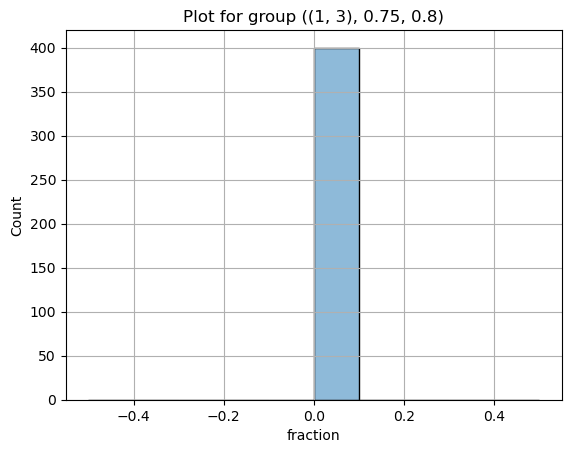

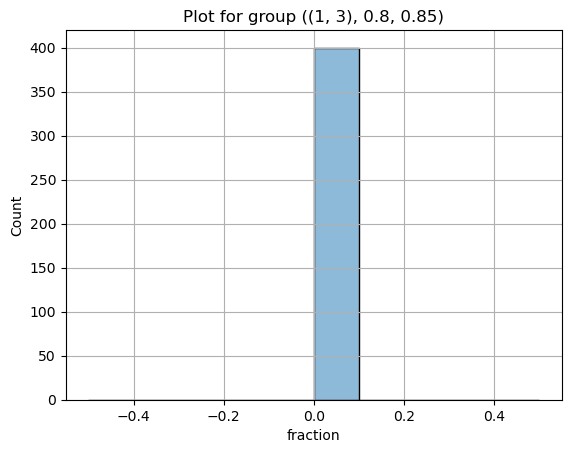

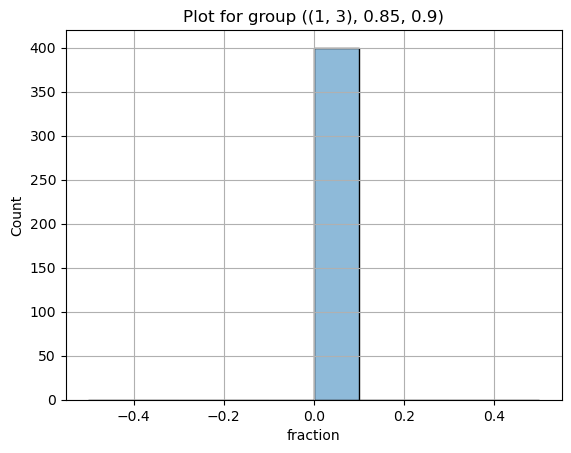

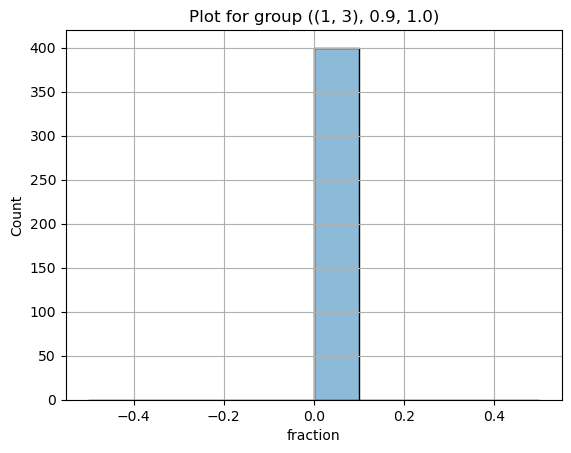

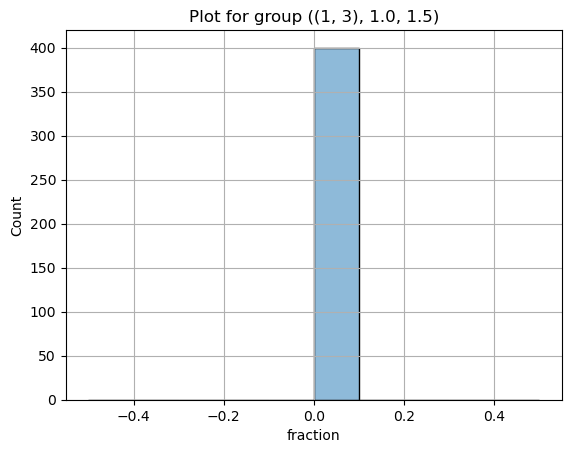

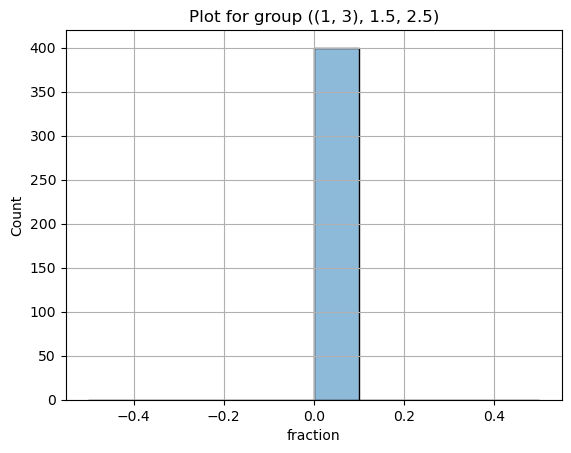

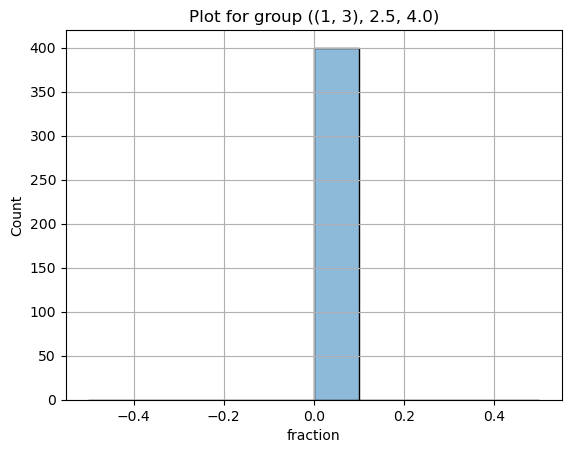

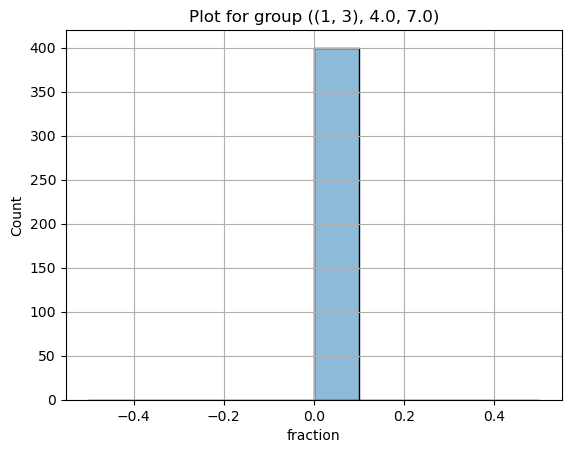

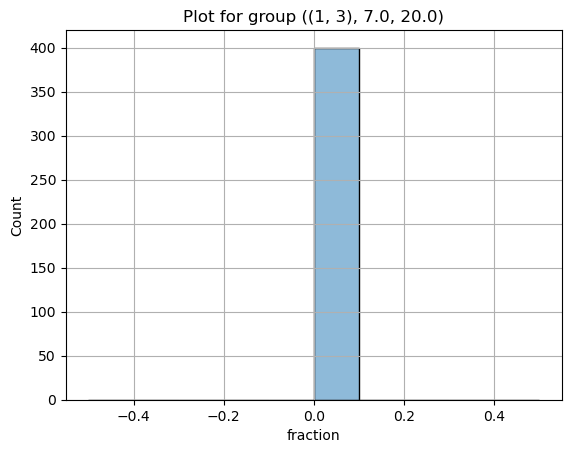

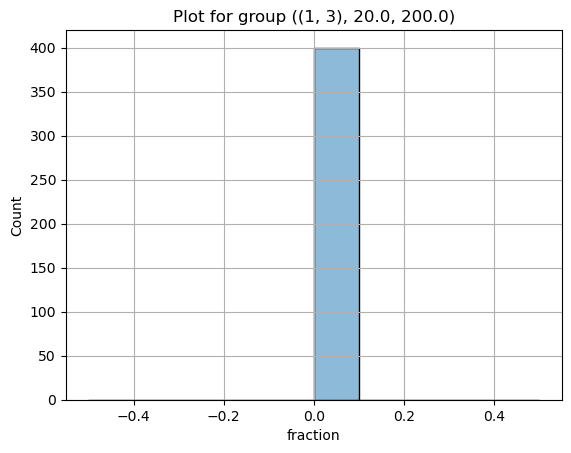

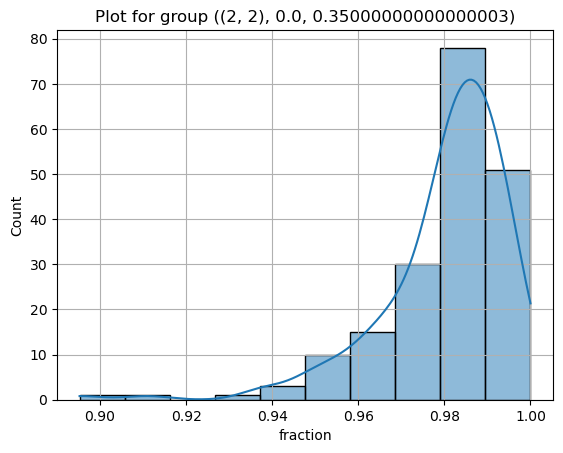

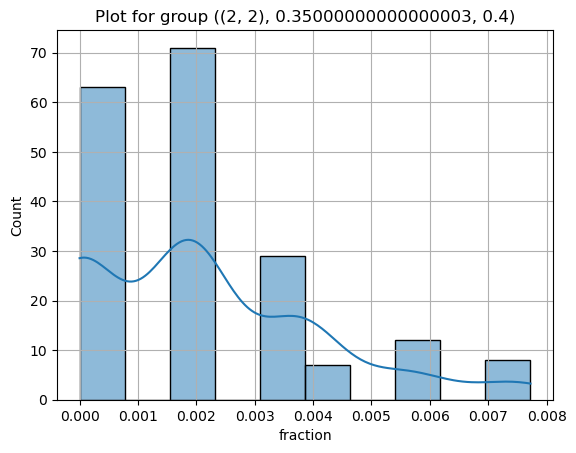

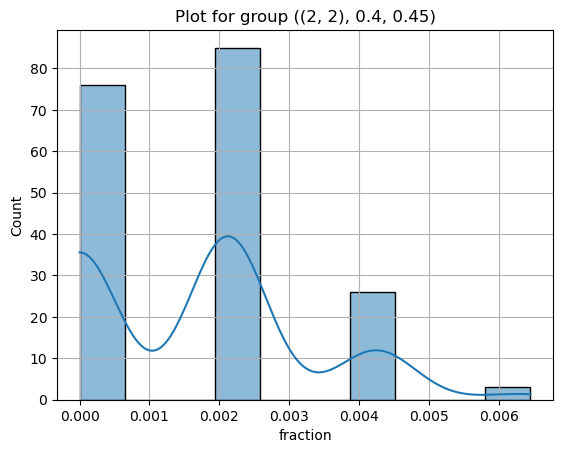

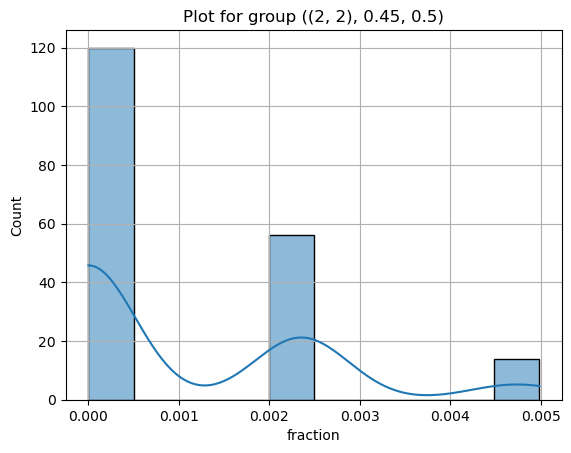

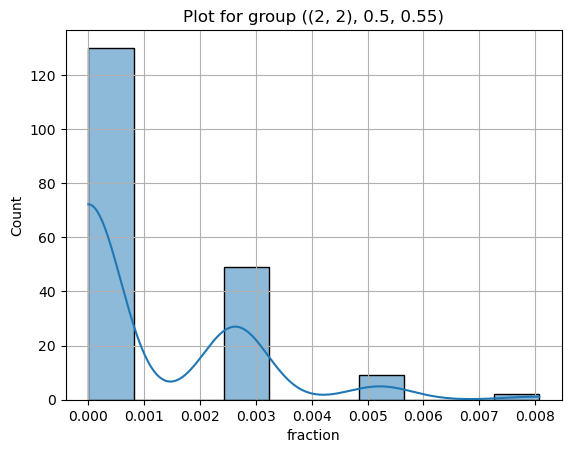

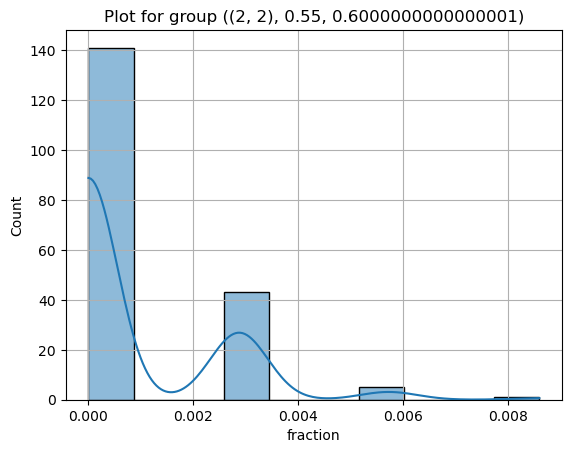

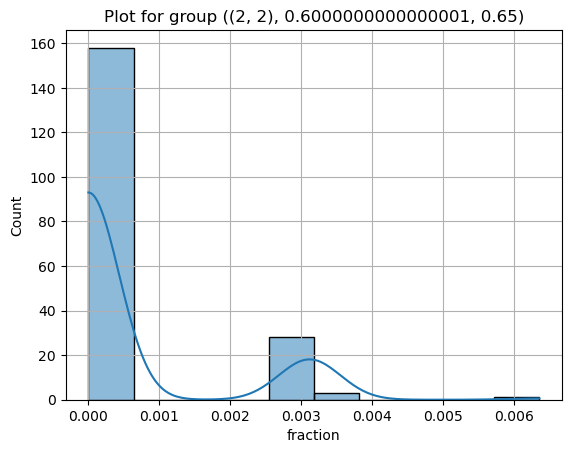

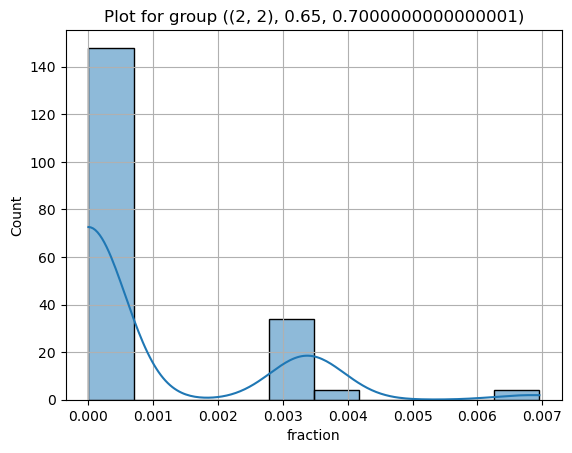

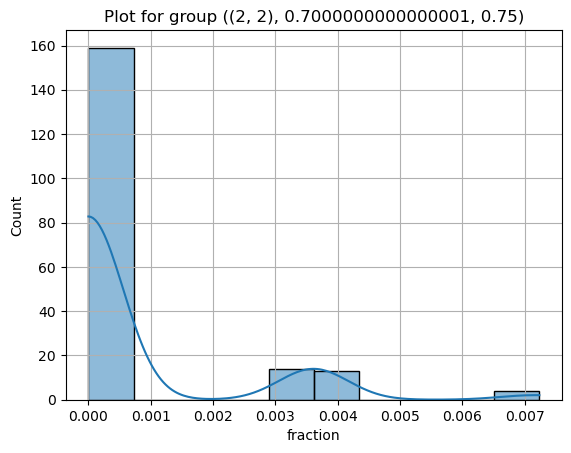

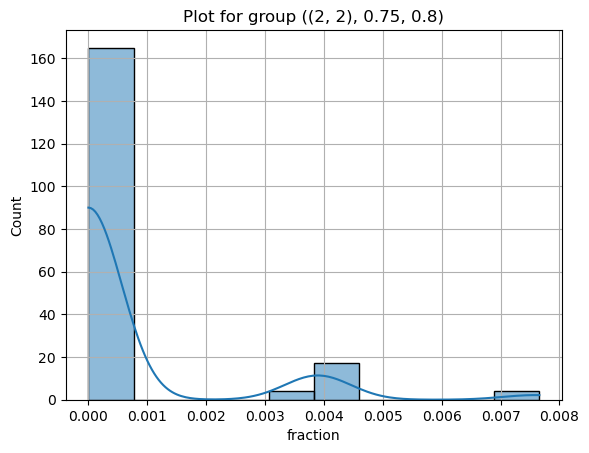

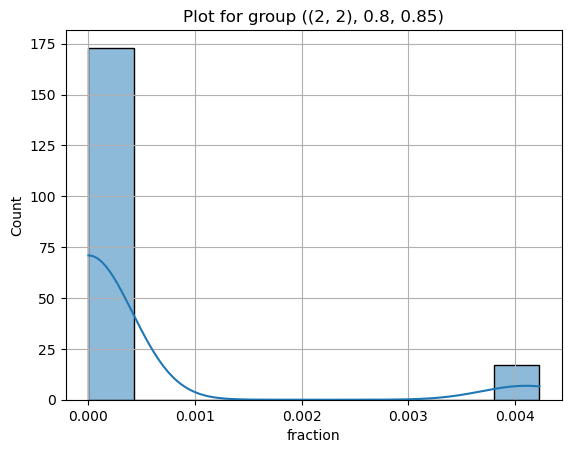

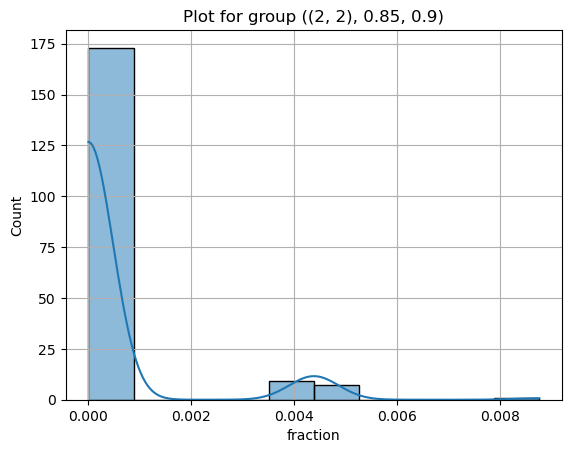

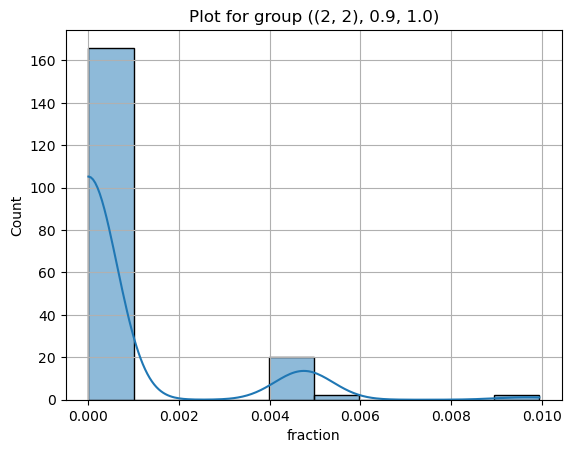

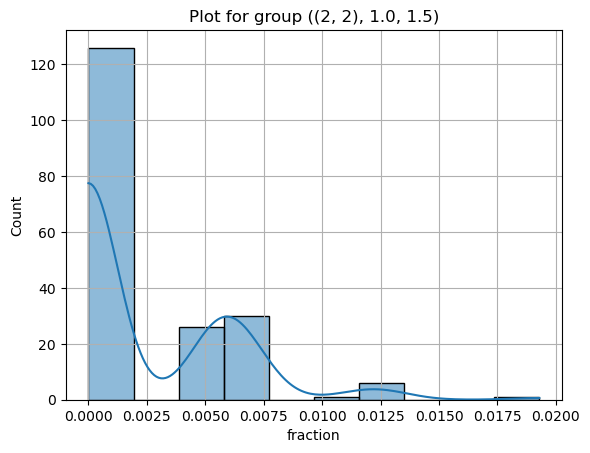

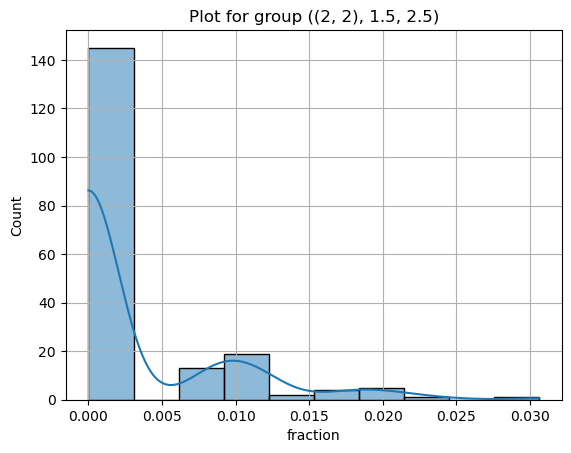

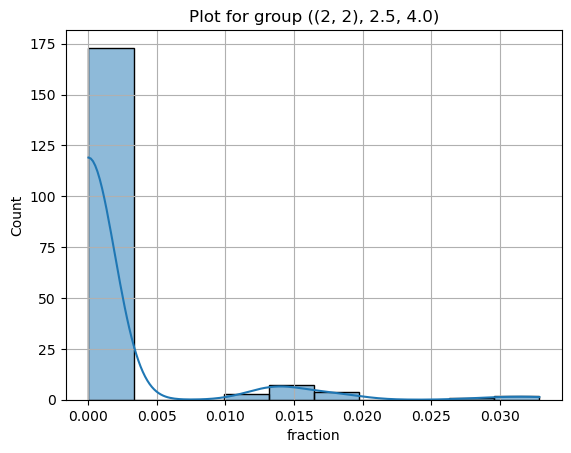

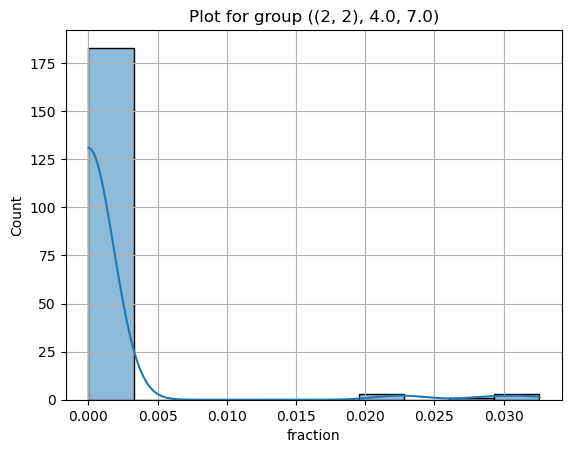

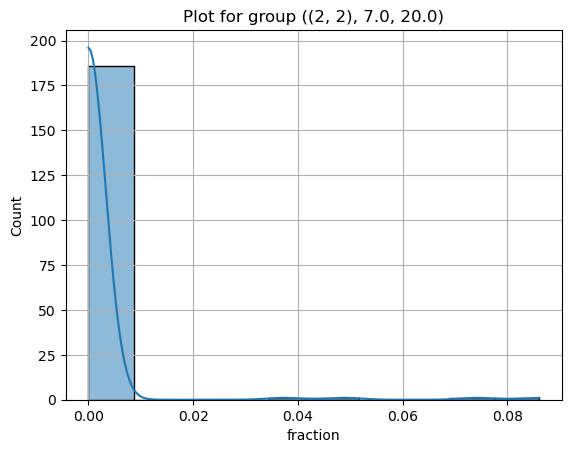

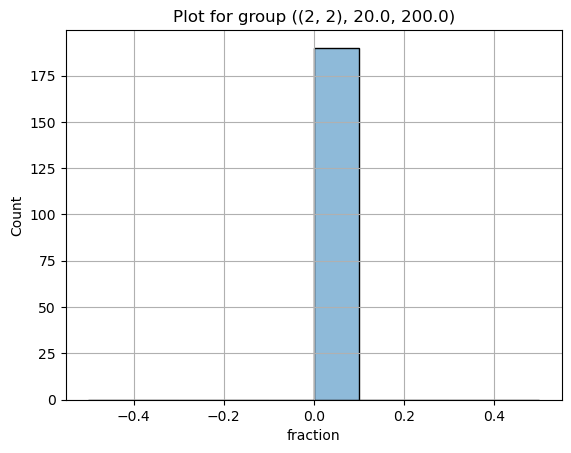

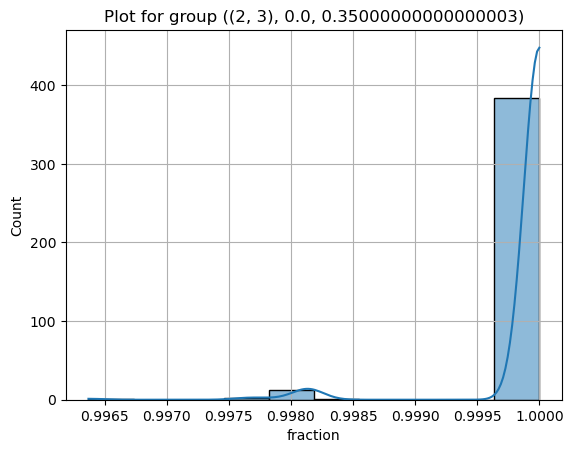

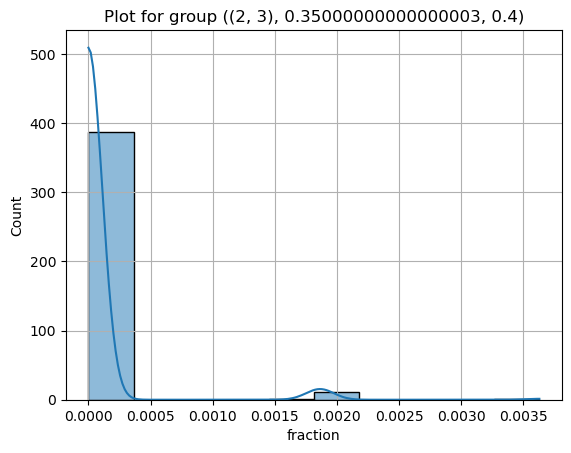

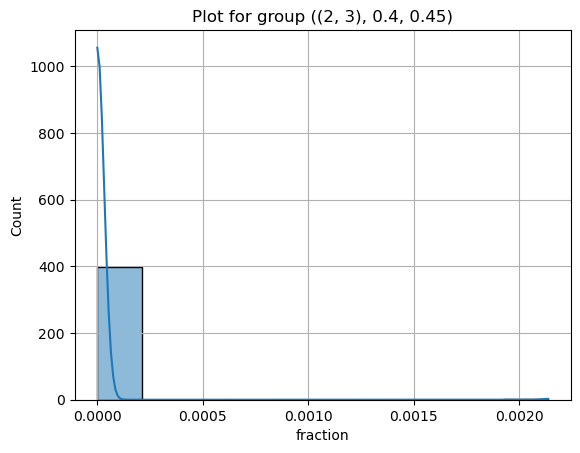

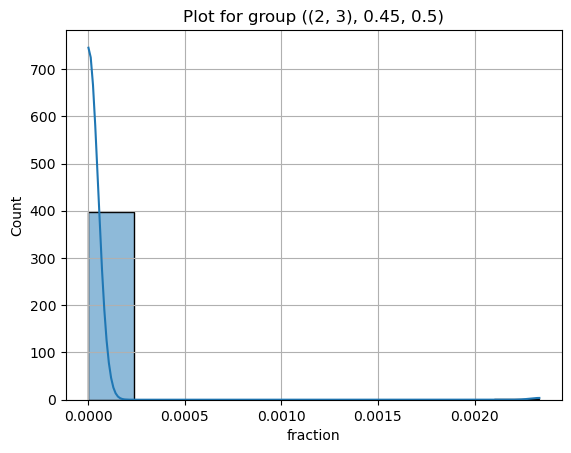

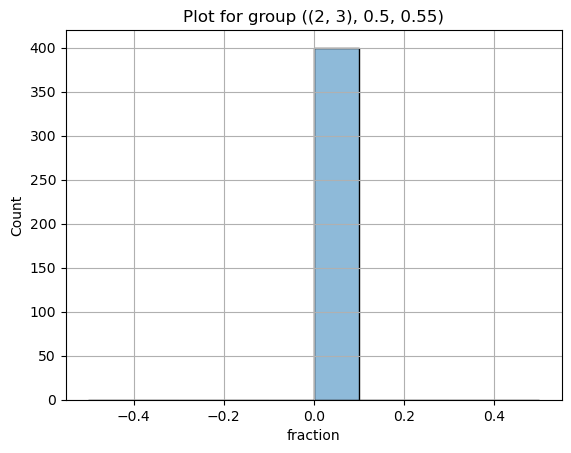

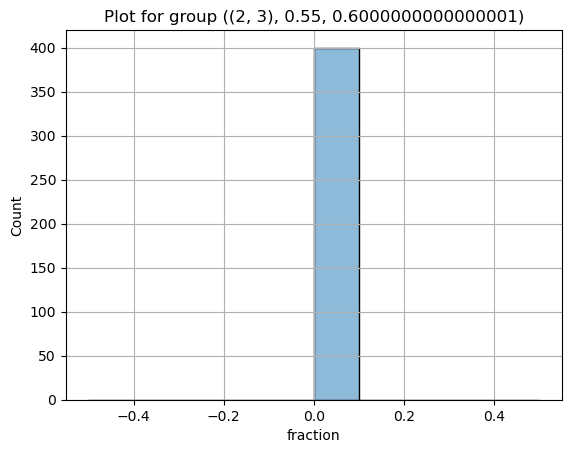

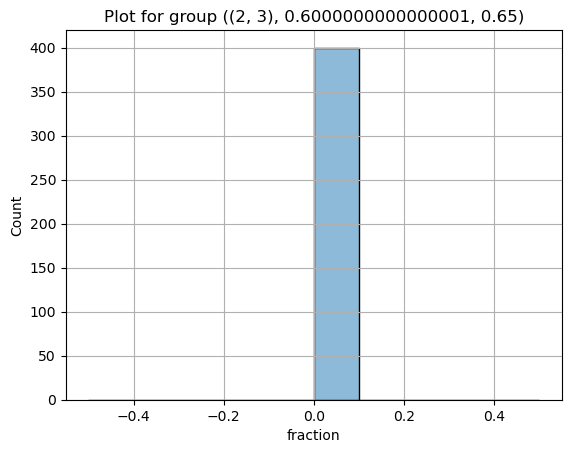

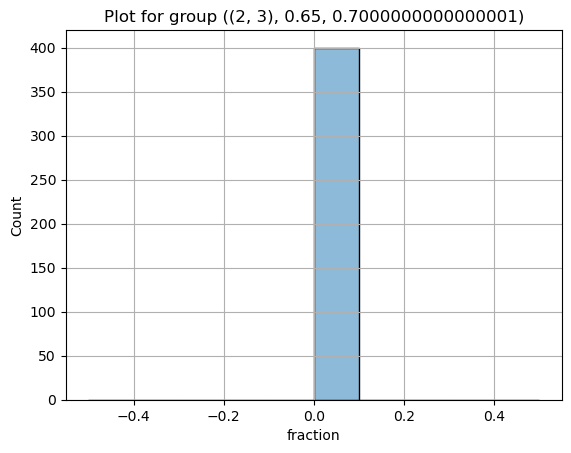

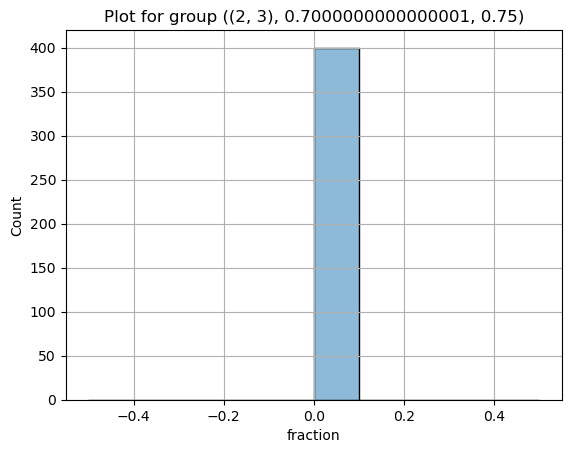

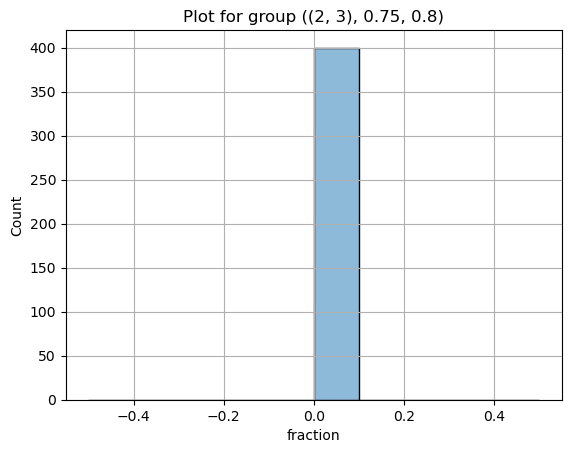

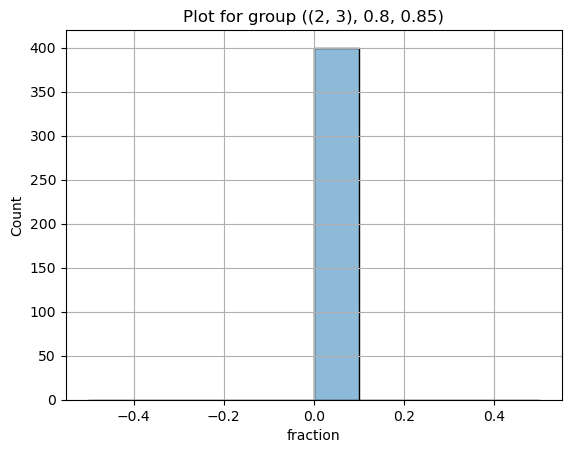

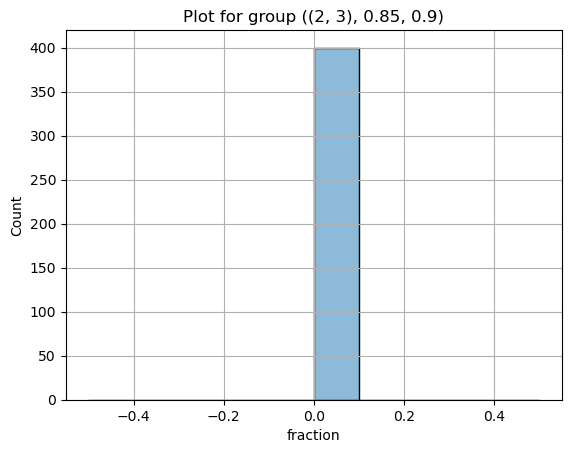

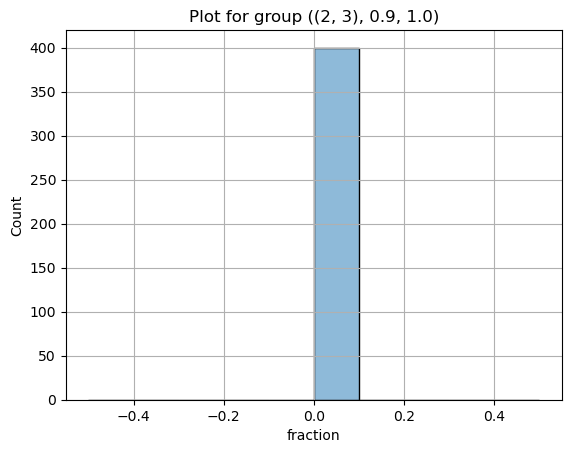

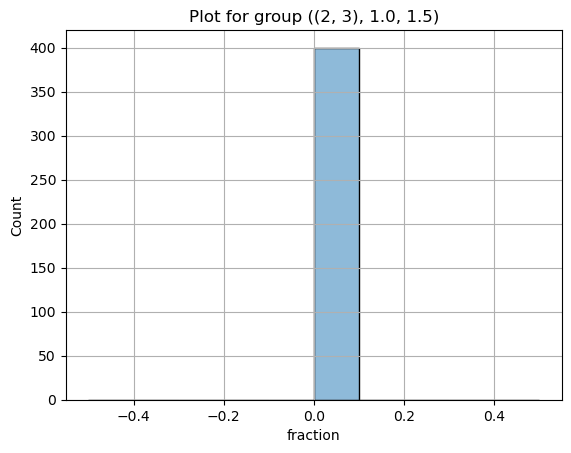

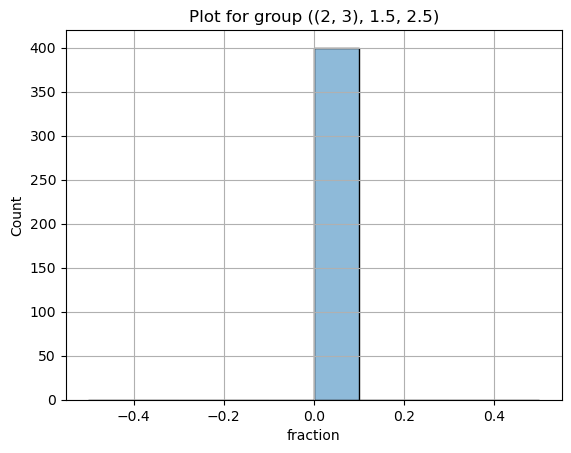

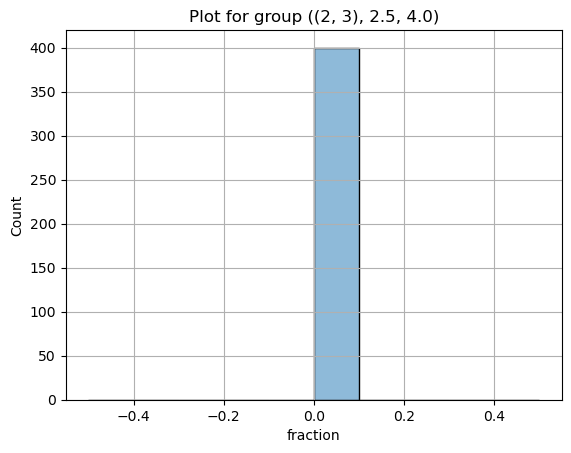

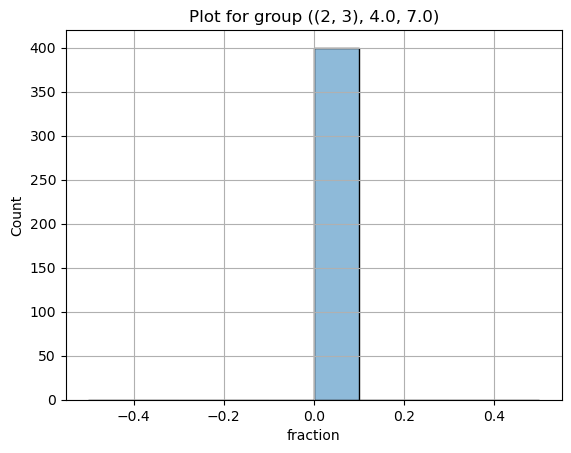

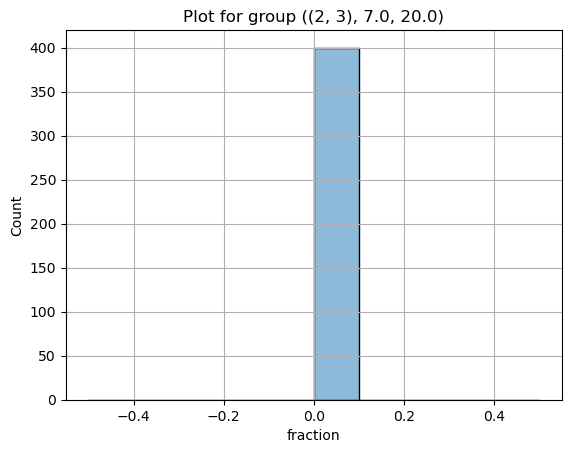

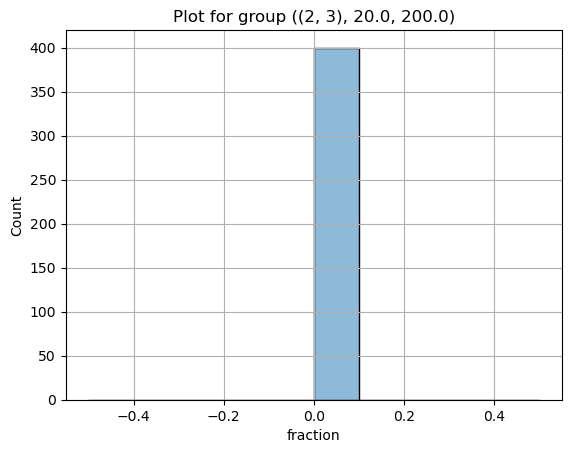

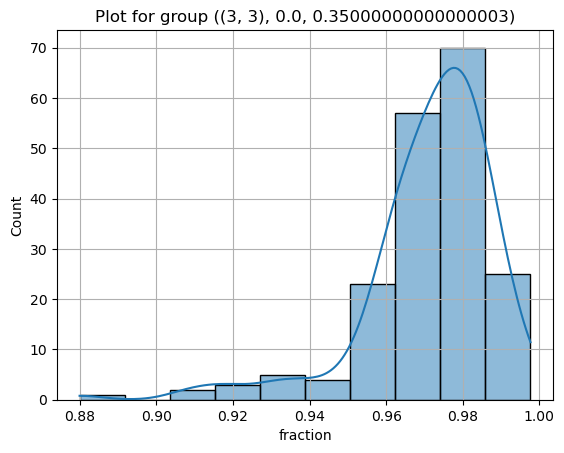

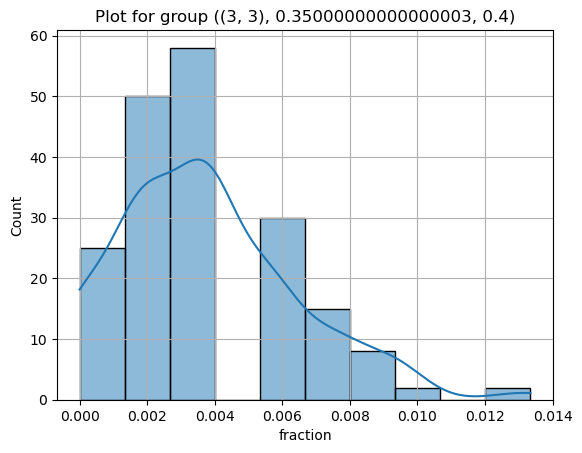

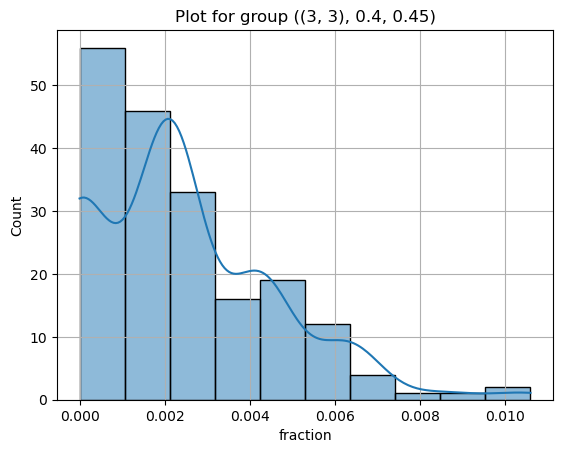

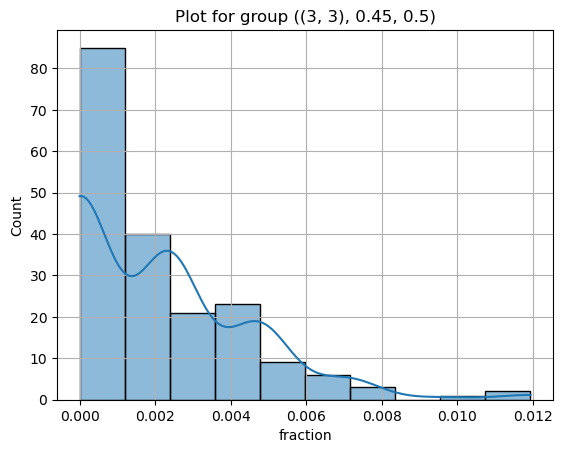

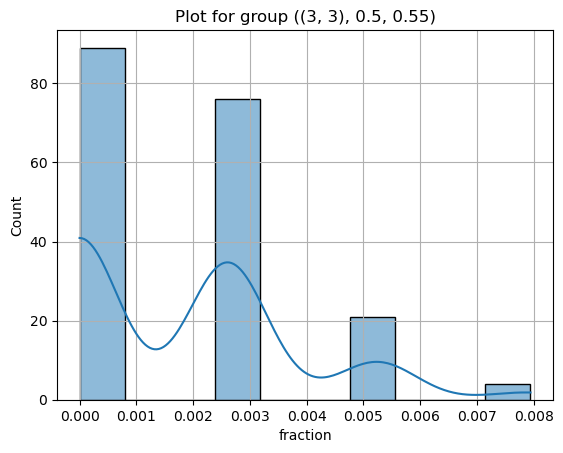

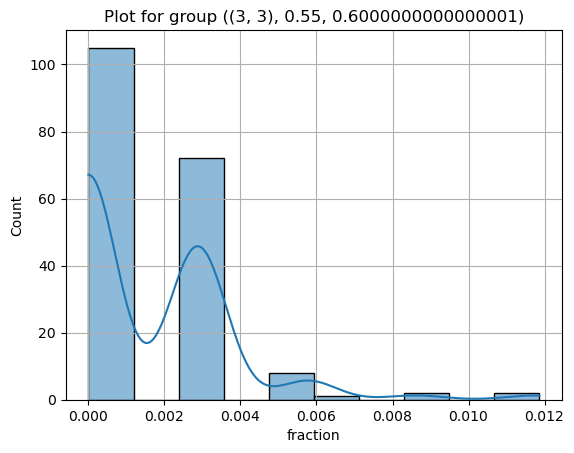

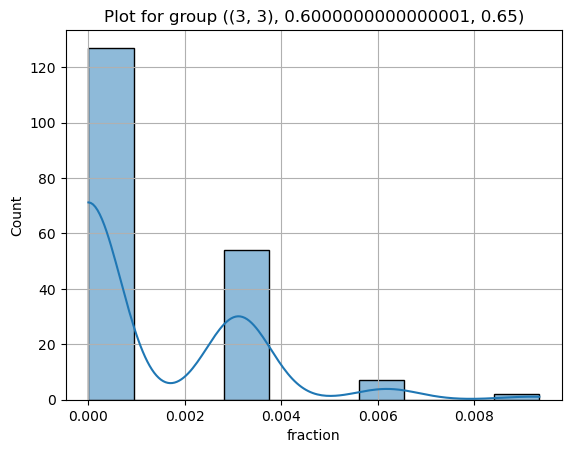

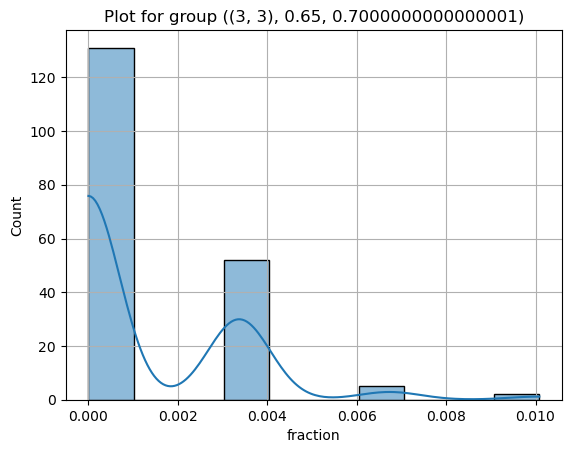

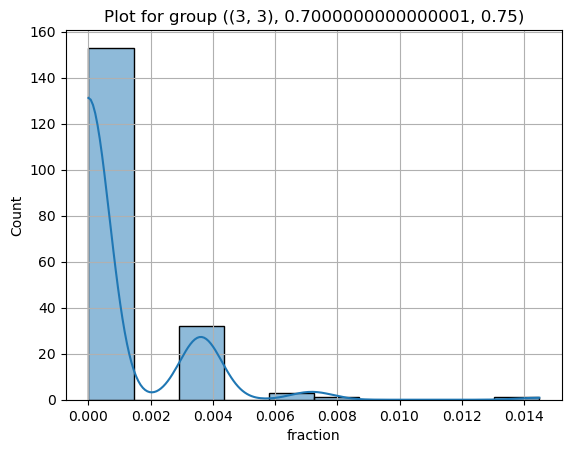

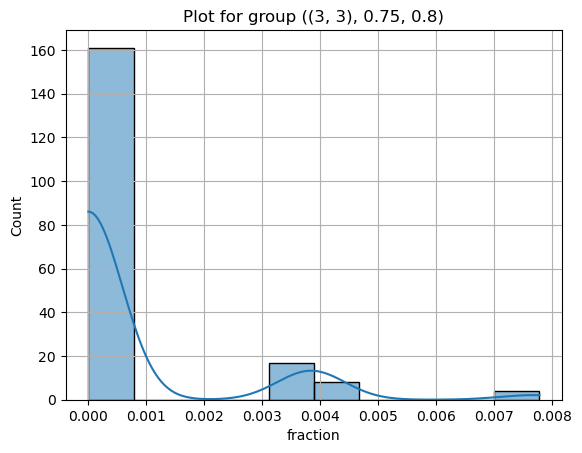

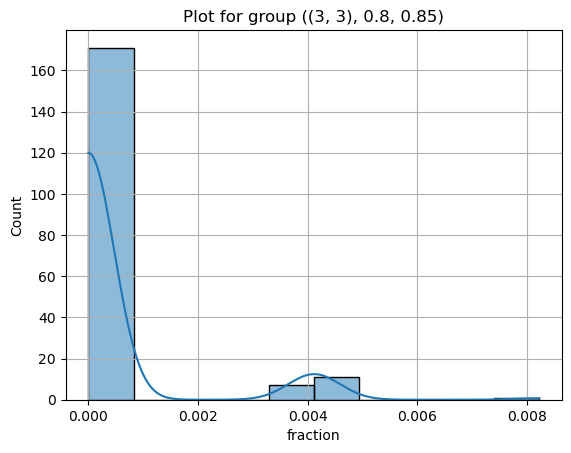

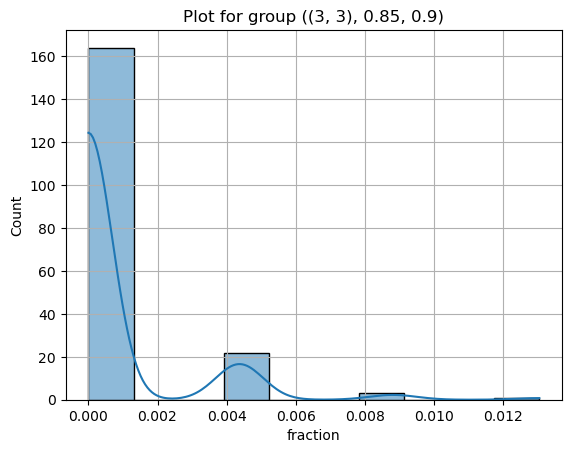

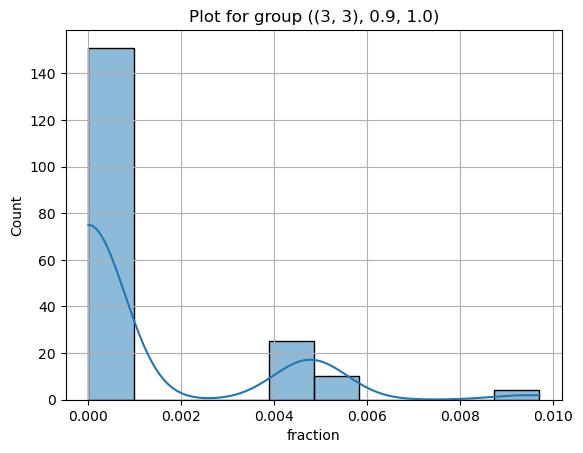

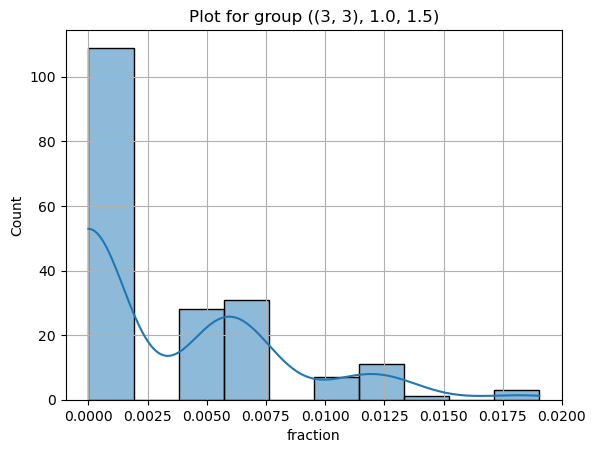

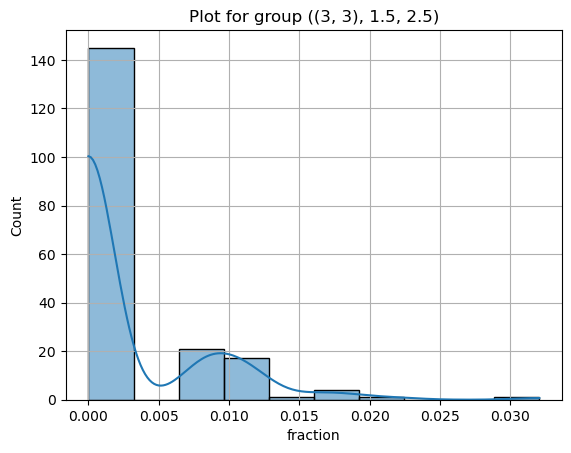

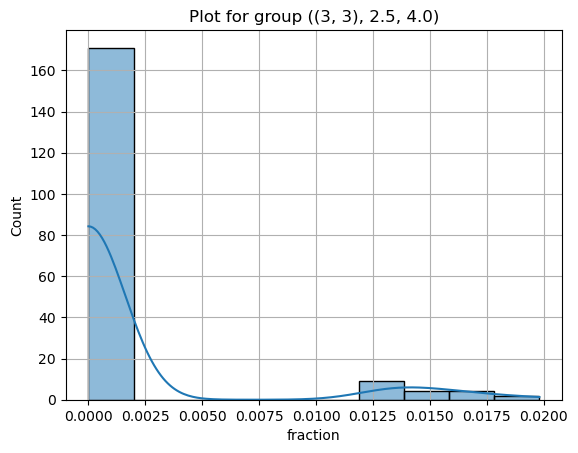

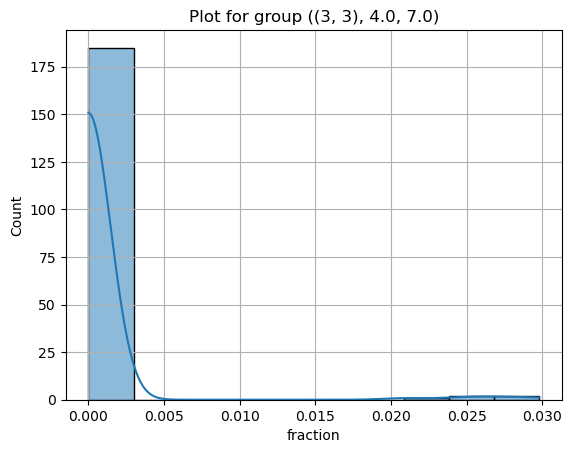

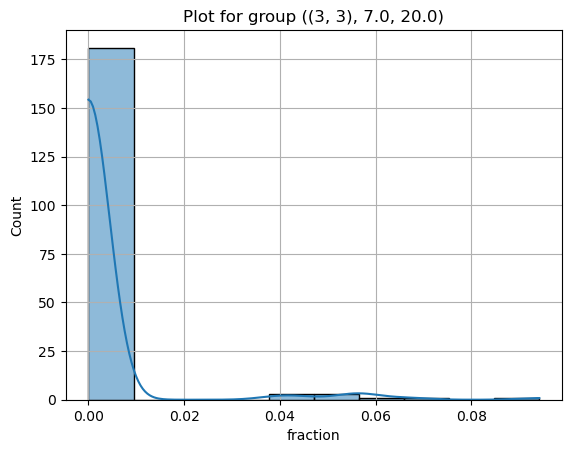

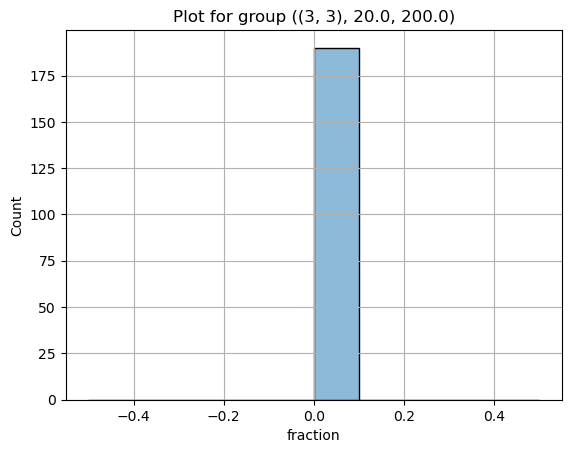

In [5]:
grouped = data.groupby(['group','u','v'])
for name, group in grouped:
    plt.figure()
    sns.histplot(group['fraction'],bins = 10,kde = True)
    plt.title(f'Plot for group {name}')
    plt.grid(True)
    plt.show()

<Axes: xlabel='fraction', ylabel='Count'>

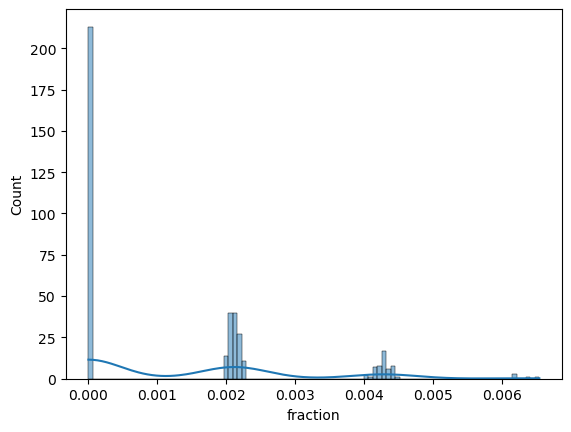

In [8]:
sns.histplot(data[(data['group'] == (0,2)) & (data['u'] == 0.4)]['fraction'],bins=100,kde = True)

In [13]:
n_boot = 1000
sample_N = data['true_N'][0]
sample_T1 = data['true_T1'][0]
sample_T2 = data['true_T2'][0]
sample_T3 = data['true_T3'][0]
columns = ['group','mean_fraction','bootstrap_variance','p_0','true_N','u','v','true_T1','true_T2','true_T3']
boot_data = pd.DataFrame(columns = columns)
for name, group in grouped:
    gg = name[0]
    u = name[1]
    v = name[2]
    non_zero = [i for i in group['fraction'] if i > 0]
    p_0 = 1- (len(non_zero)/len(group['fraction']))
    if p_0 > 0.95:
        continue
    sample_mean = sum(non_zero)/len(non_zero)
    bootstrap_means = []

    for _ in range(n_boot):
        sample = np.random.choice(non_zero, size=len(non_zero), replace=True)
        bootstrap_means.append(np.mean(sample))

# Estimate variance
    variance_estimate = np.var(bootstrap_means)
    new_row = [gg,sample_mean,variance_estimate,p_0,sample_N,u,v,sample_T1,sample_T2,sample_T3]
    boot_data.loc[len(boot_data)] = new_row



In [15]:
boot_data

group  mean_fraction  bootstrap_variance       p_0  true_N     u     v  \
0    (0, 0)       0.980209        1.525403e-06  0.000000    5000  0.00  0.35   
1    (0, 0)       0.002946        1.416340e-08  0.310526    5000  0.35  0.40   
2    (0, 0)       0.002907        2.244341e-08  0.505263    5000  0.40  0.45   
3    (0, 0)       0.003147        2.261257e-08  0.605263    5000  0.45  0.50   
4    (0, 0)       0.003283        4.079690e-08  0.726316    5000  0.50  0.55   
..      ...            ...                 ...       ...     ...   ...   ...   
109  (3, 3)       0.005216        1.775234e-07  0.863158    5000  0.85  0.90   
110  (3, 3)       0.005252        5.018053e-08  0.794737    5000  0.90  1.00   
111  (3, 3)       0.007865        1.358395e-07  0.573684    5000  1.00  1.50   
112  (3, 3)       0.011243        4.745177e-07  0.763158    5000  1.50  2.50   
113  (3, 3)       0.015080        2.310459e-07  0.900000    5000  2.50  4.00   

     true_T1  true_T2  true_T3  
0         30      100     1000  
1         30      100     1000  
2         30      100     1000  
3         30      100     1000  
4         30      100     1000  
..       ...      ...      ...  
109       30      100     1000  
110       30      100     1000  
111       30      100     1000  
112       30      100     1000  
113       30      100     1000  

[114 rows x 10 columns]

In [1]:
from one_population_data import simulate
N = [5000]
L =  [0,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,1,1.5,2.5,5,20,200] 

In [34]:
final_data = pd.DataFrame(columns = ['u','v','mean'])

for _ in range(300):
    ibd = simulate(N,L,2,1e6,10)
    data = pd.DataFrame(ibd)
    grouped = data.groupby(['u','v'])
    for name, group in grouped:
        u = name[0]
        v = name[1]
        non_zero = [i for i in group['fraction'] if i > 0]
        p_0 = 1- (len(non_zero)/len(group['fraction']))
        if p_0 > 0.95:
            continue
        sample_mean = sum(non_zero)/len(non_zero)
        new_data = [u,v,sample_mean]
        final_data.loc[len(final_data)] = new_data

    

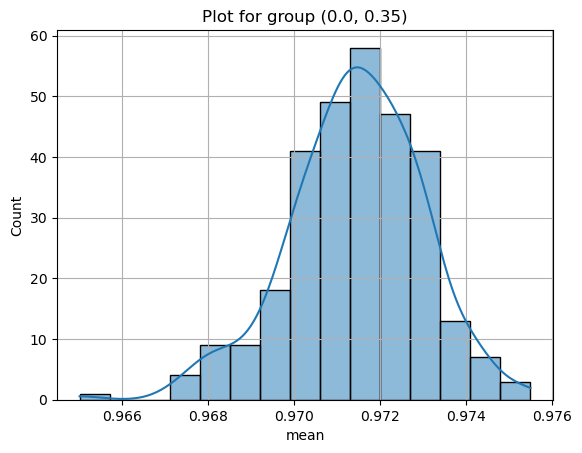

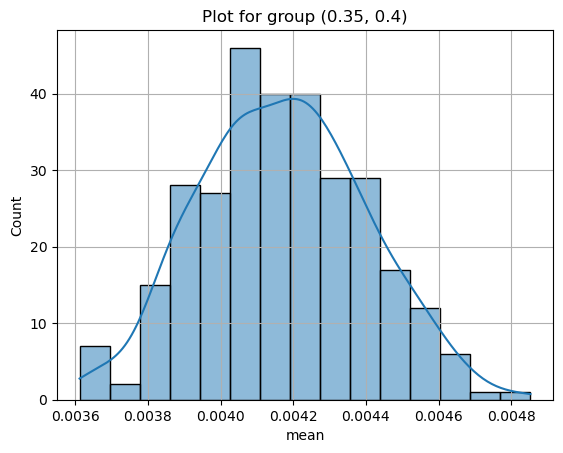

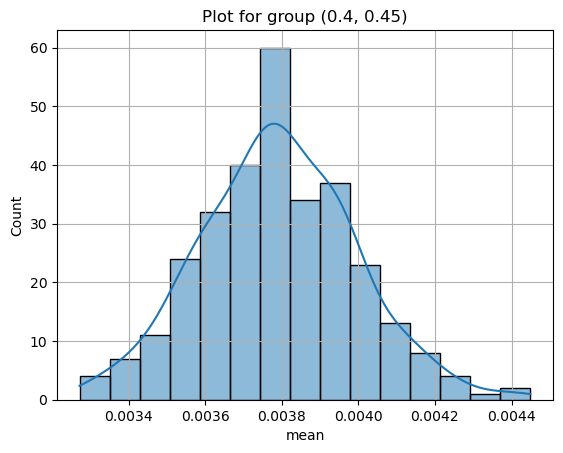

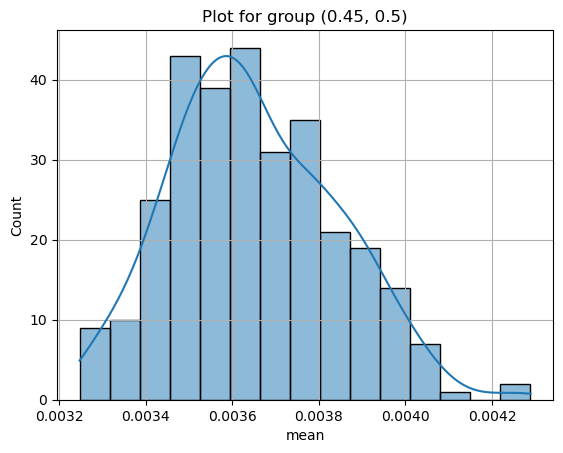

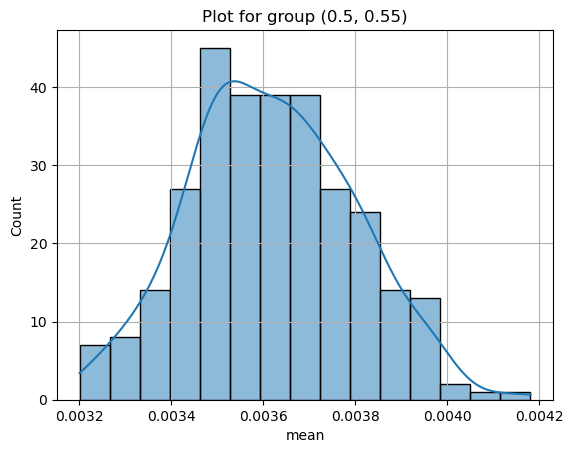

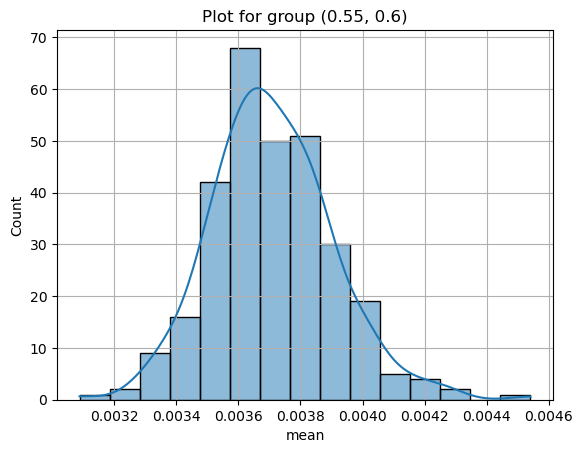

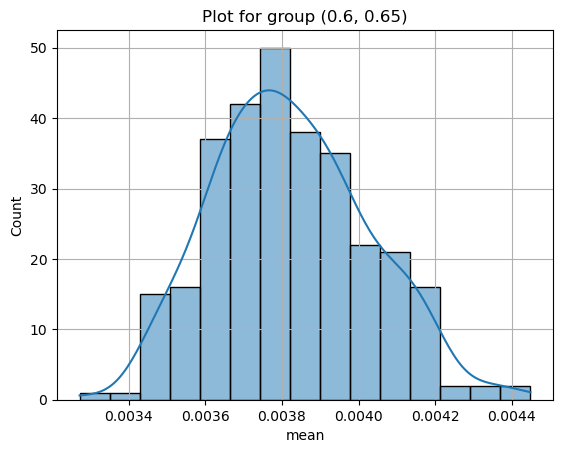

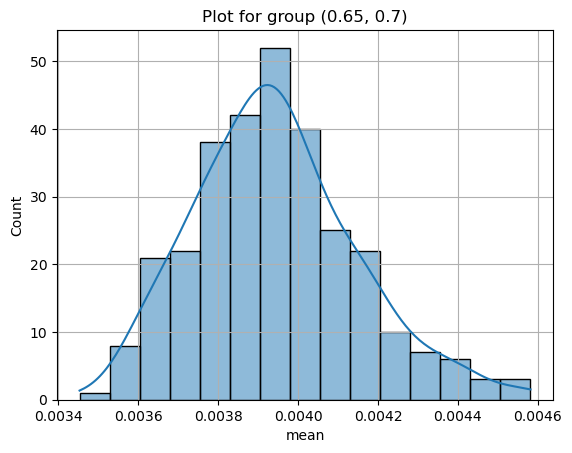

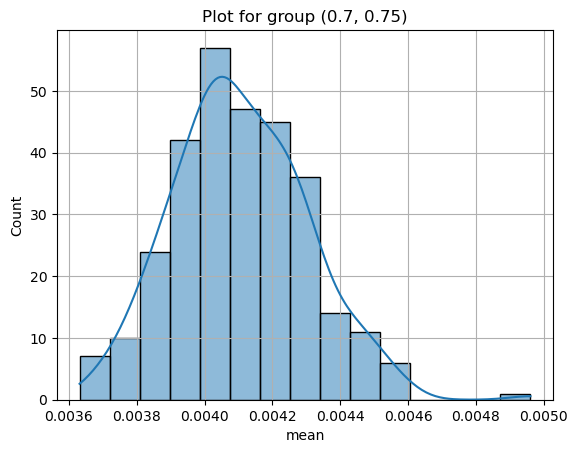

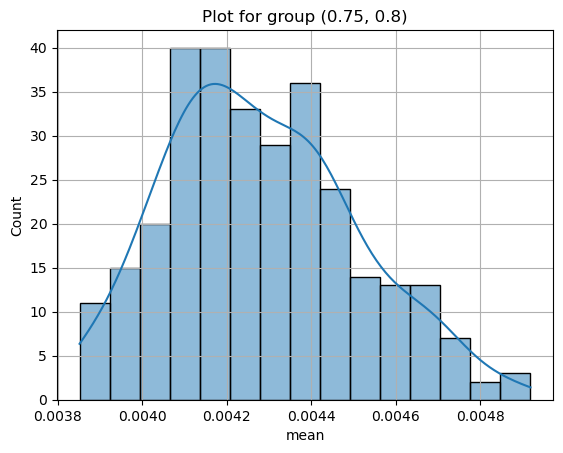

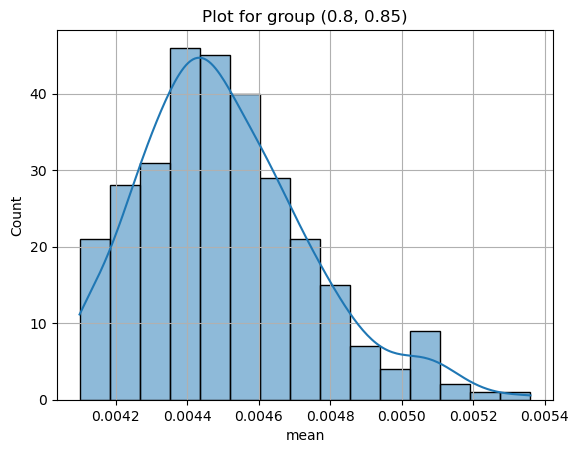

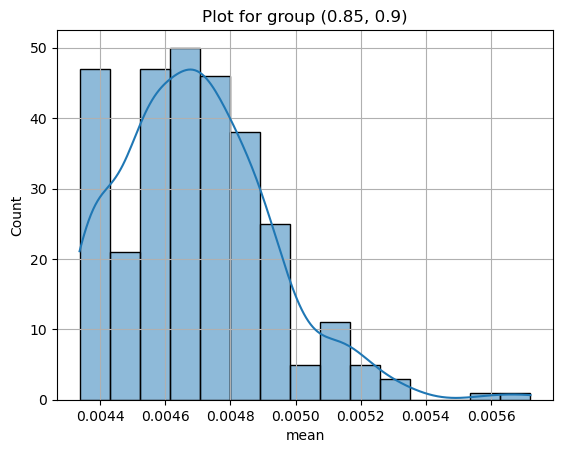

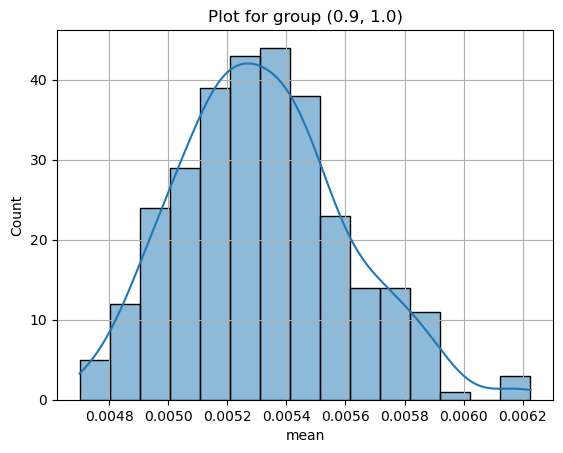

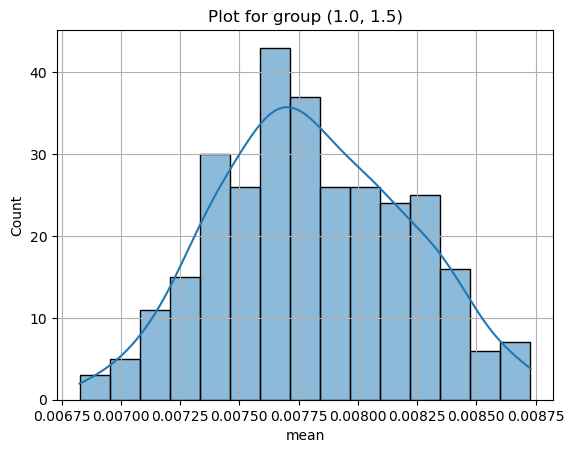

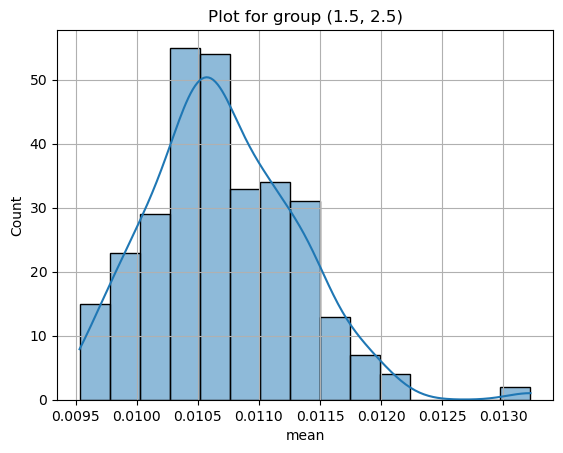

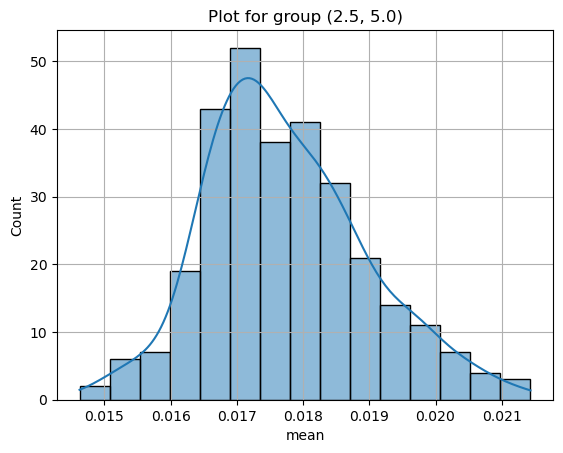

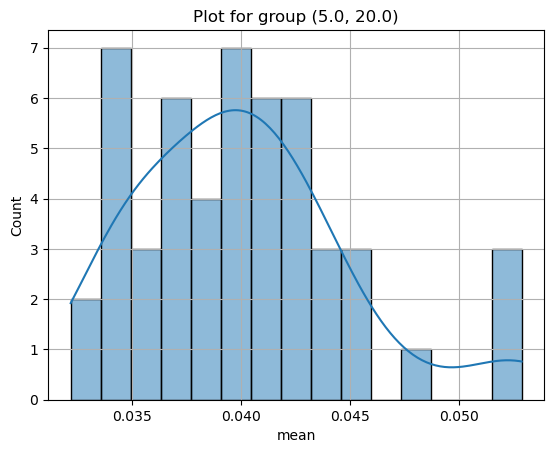

In [35]:
gg = final_data.groupby(['u','v'])
for name, group in gg:
    plt.figure()
    sns.histplot(group['mean'],bins = 15,kde = True)
    plt.title(f'Plot for group {name}')
    plt.grid(True)
    plt.show()